In [148]:
import os
import pandas as pd

In [149]:
cp_path_fjssp = r'C:\Users\huda\Downloads\fjssp\fjssp\results_cplex_cp.txt'
ortools_path_fjssp = r'C:\Users\huda\Downloads\fjssp\fjssp\results_ortools.txt'
gurobi_path_fjssp = r'C:\Users\huda\Downloads\all\all\fjssp\results_gurobi.txt'#r'C:\Users\huda\Downloads\OneDrive_1_12-17-2024\results_gurobi.txt'
cplp_path_fjssp = r'C:\Users\huda\Downloads\OneDrive_1_12-17-2024\results_cplex_lp.txt'
hexaly_path_fjssp = r'C:\Users\huda\Downloads\results_hexaly(1).txt'

In [150]:
cp_path_fjssp = r'C:\Users\huda\Downloads\fjssp_no_worker_results\results_cplex_cp.txt'
ortools_path_fjssp = r'C:\Users\huda\Downloads\fjssp_no_worker_results\results_ortools.txt'
gurobi_path_fjssp = r'C:\Users\huda\Downloads\fjssp_no_worker_results\results_gurobi.txt'#r'C:\Users\huda\Downloads\OneDrive_1_12-17-2024\results_gurobi.txt'
cplp_path_fjssp = r'C:\Users\huda\Desktop\paper_results\fjssp\results_cplex_lp.txt'
#hexaly_path_fjssp = r'C:\Users\huda\Downloads\results_hexaly(1).txt'

In [151]:
cp_path_fjssp_w = r'C:\Users\huda\Downloads\results\results_cplex_cp.txt'
ortools_path_fjssp_w = r'C:\Users\huda\Downloads\results\results_ortools.txt'
cplp_path_fjssp_w = r'C:\Users\huda\Downloads\results\results_cplex_lp_rewritten.txt'
gurobi_path_fjssp_w = r'C:\Users\huda\Downloads\all\all\fjssp_w\results_gurobi.txt'#r'C:\Users\huda\Downloads\results_gurobi(2).txt'
hexaly_path_fjssp_w = r'C:\Users\huda\Downloads\results\results_hexaly_rewritten.txt'

In [152]:
def read_file(file : str, worker : bool = True) -> pd.DataFrame:
    if worker:
        file_content = pd.read_csv(file, names=['name','optimization_status','fitness_value','lower_bound', 'runtime', 'result_vector1', 'result_vector2', 'result_vector3', 'peak_cpu', 'peak_ram', 'resource_history', 'best_result_history'], sep=';')#, converters={'best_result_history': pd.eval})
    else:#
        file_content = pd.read_csv(file, names=['name','optimization_status','fitness_value','lower_bound', 'runtime', 'result_vector1', 'result_vector2', 'peak_cpu', 'peak_ram', 'resource_history', 'best_result_history'], sep=';')#, converters={'best_result_history': pd.eval})
    df = pd.DataFrame(file_content)
    del file_content
    if worker:
        df = df.drop(columns=['result_vector1', 'result_vector2', 'result_vector3', 'peak_cpu', 'peak_ram'])
    else:
        df = df.drop(columns=['result_vector1', 'result_vector2', 'peak_cpu', 'peak_ram'])
    df = df[~df['name'].str.startswith('Error')]
    df = df[df['fitness_value'] != float('inf')]
    return df

In [153]:
cp_fjssp = read_file(cp_path_fjssp, False)
cp_fjssp_w = read_file(cp_path_fjssp_w)

In [154]:
cplp_fjssp = read_file(cplp_path_fjssp, False)
cplp_fjssp_w = read_file(cplp_path_fjssp_w)

In [155]:
gurobi_fjssp = read_file(gurobi_path_fjssp, False)
gurobi_fjssp_w = read_file(gurobi_path_fjssp_w)

In [156]:
ortools_fjssp = read_file(ortools_path_fjssp, False)
ortools_fjssp_w = read_file(ortools_path_fjssp_w)

In [157]:
hexaly_fjssp = read_file(hexaly_path_fjssp, False)
hexaly_fjssp_w = read_file(hexaly_path_fjssp_w)

In [158]:
ga_path_fjssp = r'C:\Users\huda\Downloads\ga_comparison\ga'
ga_path_fjssp_w = r'C:\Users\huda\Downloads\ga_comparison\fjssp_w'

In [159]:
import json
def rewrite(path_to_results):
    files = os.listdir(path_to_results)
    json_data = {}
    for file in files:
        with open(path_to_results + "\\" + file, 'r') as f:
            content = f.read()
            content = '{"' + content[1:7] + '"' + content[8:-1] + ']' + '}'
            json_data[file[:-9]] = content
    return json_data
ga_files = os.listdir(ga_path_fjssp)
ga_fjssp_data = rewrite(ga_path_fjssp)

In [160]:
ga_fjssp_w_data = dict()
files = os.listdir(ga_path_fjssp_w)
for file in files:
    with open(ga_path_fjssp_w + '/' + file, 'r') as f:
        json_data = json.loads(f.read())
        ga_fjssp_w_data[file[:-9]] = json_data

In [161]:
ga_average_fjssp = dict()
ga_average_fjssp_w = dict()
ga_best_fjssp = dict()
ga_best_fjssp_w = dict()
ga_fjssp_full = dict()
ga_fjssp_w_full = dict()
for instance in ga_fjssp_data:
    ga_best_fjssp[instance] = float('inf')
    ga_average_fjssp[instance] = 0
    ga_instance_data = json.loads(ga_fjssp_data[instance])
    ga_fjssp_full[instance] = ga_instance_data
    for run in ga_instance_data['result']:
        fitness = run['Result']['Fitness']['Makespan']
        if fitness < ga_best_fjssp[instance]:
            ga_best_fjssp[instance] = fitness
        ga_average_fjssp[instance] += fitness
    ga_average_fjssp[instance] /= len(ga_instance_data['result'])
for instance in ga_fjssp_w_data:
    ga_best_fjssp_w[instance] = float('inf')
    ga_average_fjssp_w[instance] = 0
    for run in ga_fjssp_w_data[instance]['results']:
        fitness = run['Result']['Fitness']['Makespan']
        if fitness < ga_best_fjssp_w[instance]:
            ga_best_fjssp_w[instance] = fitness
        ga_average_fjssp_w[instance] += fitness
    ga_average_fjssp_w[instance] /= len( ga_fjssp_w_data[instance]['results'])
    

In [162]:
ortools_fjssp

,name,optimization_status,fitness_value,lower_bound,runtime,resource_history,best_result_history
0,Behnke1,1,90.0,90.0,3.646101,"[(0, 0)]","[(0, inf, -inf)]"
1,Behnke10,0,128.0,128.0,300.100540,"[(0, 0)]","[(0, inf, -inf)]"
2,Behnke11,0,262.0,262.0,300.141225,"[(0, 0)]","[(0, inf, -inf)]"
3,Behnke12,0,251.0,251.0,300.120486,"[(0, 0)]","[(0, inf, -inf)]"
4,Behnke13,0,254.0,254.0,300.115137,"[(0, 0)]","[(0, inf, -inf)]"
...,...,...,...,...,...,...,...
397,Fattahi5,1,119.0,119.0,0.020036,"[(0, 0)]","[(0, inf, -inf)]"
398,Fattahi6,1,320.0,320.0,0.024104,"[(0, 0)]","[(0, inf, -inf)]"
399,Fattahi7,1,397.0,397.0,0.038708,"[(0, 0)]","[(0, inf, -inf)]"
400,Fattahi8,1,253.0,253.0,0.030675,"[(0, 0)]","[(0, inf, -inf)]"


In [163]:
ortools_fjssp[ortools_fjssp['optimization_status'] == 1].count()

name                   243
optimization_status    243
fitness_value          243
lower_bound            243
runtime                243
resource_history       243
best_result_history    243
dtype: int64

In [164]:
ortools_fjssp_w[ortools_fjssp_w['optimization_status'] == 1].count()

name                   39
optimization_status    39
fitness_value          39
lower_bound            39
runtime                39
resource_history       39
best_result_history    39
dtype: int64

In [165]:
def setup_dict():
    compare = dict()
    compare['worker'] = dict()
    compare['no_worker'] = dict()
    return compare

In [219]:
solver = dict()
solver['cplex_cp'] = dict()
solver['ortools'] = dict()
solver['ga_best'] = dict()
solver['ga_average'] = dict()
solver['gurobi'] = dict()
solver['cplex_lp'] = dict()

In [220]:
solver = dict()
solver['cplex_cp'] = dict()
solver['ortools'] = dict()
solver['ga_best'] = dict()
solver['ga_average'] = dict()
solver['gurobi'] = dict()
solver['cplex_lp'] = dict()

In [221]:
def get_time(run, target, step):
    for i in range(len(run['OverallBestFitness'])):
        if run['OverallBestFitness'][i] <= target:
            return i * step
    return len(run['OverallBestFitness']) * step

def time_to_best_ga(instance):
    # best, average
    #instance = instance['results']
    best = None
    best_time = float('inf')
    for run in instance:
        target = run['Result']['Fitness']['Makespan']
        generations = max(1, len(run['OverallBestFitness']))
        runtime = min(1200, run['Result']['TimeInSeconds'])
        genTime = runtime/generations # NOTE that this is not entirely accurate due to growing population size
        time = get_time(run, target, genTime)
        if not best or run['Result']['Fitness']['Makespan'] < best['Result']['Fitness']['Makespan']:
            best = run
            best_time = time
        elif run['Result']['Fitness']['Makespan'] == best['Result']['Fitness']['Makespan']:
            if time < best_time:
                best_time = time
    return best_time

def n_improvements(instance):
    #instance = instance['results']
    best = None
    best_count = float('inf')
    for run in instance:
        count = 0
        if not best or run['Result']['Fitness']['Makespan'] <= best['Result']['Fitness']['Makespan']:
            if len(run['OverallBestFitness']) > 0:
                last = run['OverallBestFitness'][0]
                count = 1
                for i in range(1, len(run['OverallBestFitness'])):
                    if run['OverallBestFitness'][i] != last:
                        count+=1
                        last = run['OverallBestFitness'][i]
            else:
                count = 0
            if not best or run['Result']['Fitness']['Makespan'] < best['Result']['Fitness']['Makespan']:
                best_count = count
                best = run
            elif count < best_count: # same result, but less improvement steps (is that better)
                best_count = count
    return best_count

def n_improvements_average(instance):
    #instance = instance['result']
    average = 0
    for run in instance:
        if len(run['OverallBestFitness']) > 0:
            last = run['OverallBestFitness'][0]
            count = 1
            for i in range(1, len(run['OverallBestFitness'])):
                if run['OverallBestFitness'][i] != last:
                    count+=1
                    last = run['OverallBestFitness'][i]
            average+=count
    return average/len(instance)

def time_to_best_average(instance):
    #instance = instance['result']
    best = None
    multiple_best = []
    average_time = 0
    best_time = float('inf')
    for run in instance:
        generations = max(1, len(run['OverallBestFitness']))
        runtime = min(1200, run['Result']['TimeInSeconds'])
        genTime = runtime/generations # NOTE that this is not entirely accurate due to growing population size
        average_time += get_time(run, run['OverallBestFitness'][-1], genTime)
    return average_time/len(instance)

def get_runtime_average(instance):
    average = 0
    for run in instance:
        runtime = min(1200, run['Result']['TimeInSeconds'])
        average += runtime
    return average / len(instance)

def get_runtime_best(instance):
    best = None
    best_time = float('inf')
    for run in instance:
        if not best or run['Result']['Fitness']['Makespan'] < best['Result']['Fitness']['Makespan']:
            best = run
            best_time = min(1200, best['Result']['TimeInSeconds'])
        elif run['Result']['Fitness']['Makespan'] == best['Result']['Fitness']['Makespan']:
            runtime = min(1200, run['Result']['TimeInSeconds'])
            if runtime < best_time:
                best_time = runtime
    return best_time

In [222]:
time_to_best_ga(ga_fjssp_w_data['Behnke42']['results'])

571.7162471395881

In [223]:
compare = setup_dict()
for instance in ga_average_fjssp:
    compare['no_worker'][instance] = {
        'fitness': ga_average_fjssp_w[instance],
        'time_to_best': time_to_best_average(ga_fjssp_full[instance]['result']),
        'n_improvements': n_improvements_average(ga_fjssp_full[instance]['result']),
        'runtime': get_runtime_average(ga_fjssp_full[instance]['result']) # TODO: maybe?
    }
for instance in ga_average_fjssp_w:
    compare['worker'][instance] = {
        'fitness': ga_average_fjssp_w[instance],
        'time_to_best': time_to_best_ga(ga_fjssp_w_data[instance]['results']),
        'n_improvements': n_improvements_average(ga_fjssp_w_data[instance]['results']),
        'runtime': get_runtime_average(ga_fjssp_w_data[instance]['results']) # TODO: maybe?
    }
solver['ga_average'] = compare

In [224]:
compare = setup_dict()
for instance in ga_best_fjssp:
    compare['no_worker'][instance] = {
        'fitness': ga_best_fjssp_w[instance],
        'time_to_best': time_to_best_ga(ga_fjssp_full[instance]['result']),
        'n_improvements': n_improvements(ga_fjssp_full[instance]['result']),
        'runtime': get_runtime_best(ga_fjssp_full[instance]['result'])
        #'runtime': row['runtime'] # TODO: maybe?
    }
for instance in ga_best_fjssp_w:
    compare['worker'][instance] = {
        'fitness': ga_best_fjssp_w[instance],
        'time_to_best': time_to_best_ga(ga_fjssp_w_data[instance]['results']),
        'n_improvements': n_improvements(ga_fjssp_w_data[instance]['results']),
        'runtime': get_runtime_best(ga_fjssp_w_data[instance]['results'])
        #'runtime': row['runtime'] # TODO: maybe?
    }
solver['ga_best'] = compare

In [225]:
def remap(name):
    if name.startswith('_'):
        name = name[1:]
    values = name.split('_')
    if values[0].startswith('Behnke'):
        return 'Behnke'+values[-1]
    if values[0].startswith('Brandimarte'):
        return 'BrandimarteMk'+values[-1]
    if values[0].startswith('Chambers'):
        return 'ChambersBarnes'+values[-1]
    if values[0].startswith('Hurink') and values[1].startswith('s'):
        return 'HurinkSdata'+values[-1]
    if values[0].startswith('Hurink') and values[1].startswith('e'):
        return 'HurinkEdata'+values[-1]
    if values[0].startswith('Hurink') and values[1].startswith('r'):
        return 'HurinkRdata'+values[-1]
    if values[0].startswith('Hurink') and values[1].startswith('v'):
        return 'HurinkVdata'+values[-1]
    if values[0].startswith('DP'):
        return 'DPpaulli'+values[-1]
    if values[0].startswith('Kacem'):
        return 'Kacem'+values[-1]
    if values[0].startswith('Fattahi'):
        return 'Fattahi'+values[-1]
    return name

In [226]:
test = '[(1, 2, 3), (2, 2, 3), (3, 2, 3), (inf, 0, 0)]'

In [227]:
changed = test.replace('inf', 'float("inf")')
etest = eval(changed)

In [228]:
etest[3][0]

inf

In [229]:
def get_last(history):
    data = history.split('(')
    result = float(data[-1][:-2].split(', ')[0])
    return result

def extract_time_to_best(instances):
    result = dict()
    #NOTE: does not work for hexaly
    for index, row in instances.iterrows():
        history = row['best_result_history']
        result[row['name']] = get_last(history)
    return result

def extract_n_improvements(instances):
    result = dict()
    for index, row in instances.iterrows():
        history = row['best_result_history']
        count = 0
        if not '<docplex' in history:
            history_list = eval(history.replace('inf', 'float("inf")'))
            last = history_list[0][1]
            count = 1
            for i in range(1, len(history_list)):
                if history_list[i][1] != last:
                    last = history_list[i][1]
                    count += 1
        result[row['name']] = count
    return result

def extract_solver_data(fjssp, fjssp_w):
    compare = setup_dict()
    time_to_best = extract_time_to_best(fjssp)
    n_improvements = extract_n_improvements(fjssp)
    for index, row in fjssp.iterrows():
        compare['no_worker'][row['name']] = {
            'fitness': row['fitness_value'],
            'lower_bound': row['lower_bound'],
            'status': row['optimization_status'],
            'runtime': row['runtime'],
            'time_to_best': time_to_best[row['name']],
            'n_improvements': n_improvements[row['name']] # TODO: test
        }
    time_to_best = extract_time_to_best(fjssp_w)
    n_improvements = extract_n_improvements(fjssp_w)
    for index, row in fjssp_w.iterrows():
        name = remap(row['name'][2:-12])
        if name in compare['no_worker']:
            compare['worker'][name] = {
                'fitness': row['fitness_value'],
                'lower_bound': row['lower_bound'],
                'status': row['optimization_status'],
                'runtime': row['runtime'],
                'time_to_best': time_to_best[row['name']],
                'n_improvements': n_improvements[row['name']] # TODO: test
            }
    return compare

In [230]:
solver['cplex_cp'] = extract_solver_data(cp_fjssp, cp_fjssp_w)
solver['cplex_lp'] = extract_solver_data(cplp_fjssp, cplp_fjssp_w)
solver['gurobi'] = extract_solver_data(gurobi_fjssp, gurobi_fjssp_w)
solver['ortools'] = extract_solver_data(ortools_fjssp, ortools_fjssp_w)


In [231]:
#solver['hexaly'] = extract_solver_data(hexaly_fjssp, hexaly_fjssp_w)

In [232]:
import statistics
import math

def calculate_flexibility(machines_for_all_operations, n_machines): 
    counts = []

    for m in machines_for_all_operations:
        counts.append(len(m))
    
    return statistics.mean(counts) / n_machines

def calculate_duration_variety(durations):
    counts = []

    for d in durations:
        counts.append(len(d))

    return len(set(counts)) / len(counts)

def calculate_average_operations(job_sequence):
    n_jobs = 1
    counts = [1]
    for i in range(1, len(job_sequence)):
        if job_sequence[i] != job_sequence[i-1]:
            n_jobs+=1
            counts.append(0)
        counts[-1] += 1
    return (sum(counts))/n_jobs


In [233]:
def calculate_duration_features_workers(durations):
    all_durations = []
    for duration in durations:
        for d in duration:
            all_durations.extend(d)
    all_durations = [d for d in all_durations if d != 0]
    min_duration = min(all_durations)
    max_duration = max(all_durations)
    span = max_duration - min_duration
    stdev = statistics.stdev(all_durations)
    return min_duration, max_duration, span, stdev

def calculate_duration_features(durations):
    all_durations = []
    for duration in durations:
        all_durations.extend(duration)
    all_durations = [d for d in all_durations if d != 0]
    min_duration = min(all_durations)
    max_duration = max(all_durations)
    span = max_duration - min_duration
    #stdev = statistics.stdev(all_durations)
    mean = sum(all_durations)/len(all_durations)
    var = sum(pow(x-mean, 2) for x in all_durations) / len(all_durations)
    stdev = math.sqrt(var)
    return min_duration, max_duration, span, stdev


In [234]:
def remap_full(name):
    if name.startswith('_'):
        name = name[1:]
    values = name.split('_')
    if values[1].startswith('Behnke'):
        return 'Behnke'+values[-1]
    if values[1].startswith('Brandimarte'):
        return 'BrandimarteMk'+values[-1]
    if values[1].startswith('Chambers'):
        return 'ChambersBarnes'+values[-1]
    if values[1].startswith('Hurink') and values[2].startswith('s'):
        return 'HurinkSdata'+values[-1]
    if values[1].startswith('Hurink') and values[2].startswith('e'):
        return 'HurinkEdata'+values[-1]
    if values[1].startswith('Hurink') and values[2].startswith('r'):
        return 'HurinkRdata'+values[-1]
    if values[1].startswith('Hurink') and values[2].startswith('v'):
        return 'HurinkVdata'+values[-1]
    if values[1].startswith('DP'):
        return 'DPpaulli'+values[-1]
    if values[1].startswith('Kacem'):
        return 'Kacem'+values[-1]
    if values[1].startswith('Fattahi'):
        return 'Fattahi'+values[-1]
    return name

from benchmarkrewriter.benchmark_parser import WorkerBenchmarkParser, BenchmarkParser
import os
includeWorkers = False
if includeWorkers:
    path = r'C:\Users\huda\Downloads\benchmarks_with_workers\benchmarks_with_workers'
    parser = WorkerBenchmarkParser()
else:
    path = r'C:\Users\huda\Documents\GitHub\scheduling_model_jrc\code\upgrades\benchmarks\all'
    parser = BenchmarkParser()
instances = os.listdir(path)
instance_data = dict()
consider_duration_features = True
for instance in instances:
    encoding = parser.parse_benchmark(path + "\\" + instance)
    feature_vector = []
    min_d, max_d, d_span, d_stdev = calculate_duration_features(encoding.durations()) if not includeWorkers else calculate_duration_features_workers(encoding.durations())
    #TODO: worker data, or just do it with base FJSSP since all benchmarks are transformed in the same way
    extracted_data = {
        "name": instance,
        "n_jobs": encoding.n_jobs(), 
        "n_machines": encoding.n_machines(),
        "n_operations": encoding.n_operations(),
        "durations": encoding.durations(),
        "job_sequence": encoding.job_sequence(),
        "machines_for_all_operations": encoding.get_all_machines_for_all_operations() if includeWorkers else encoding.get_machines_for_all_operations(),
        "flexibility": calculate_flexibility(encoding.get_all_machines_for_all_operations() if includeWorkers else encoding.get_machines_for_all_operations(), encoding.n_machines()),
        "duration_variety": calculate_duration_variety(encoding.durations()),
        "average_operations": calculate_average_operations(encoding.job_sequence()),
        "min_duration": min_d,
        "max_duration": max_d,
        "duration_span": d_span,
        "duration_std": d_stdev
    }
    instance_data[instance[:-4] if not includeWorkers else remap_full(instance[:-12])] = extracted_data


In [235]:
def print_instance(data):
    print(f"# Operations: {data['n_operations']} | # Machines: {data['n_machines']} | Flexibility: {data['flexibility']} | Duration Variety: {data['duration_variety']}")

In [236]:
def get_diff(solver, filter : bool = False, verbose : bool = False):
    diff = []
    o = []
    m = []
    f = []
    dv = []
    for instance in solver['worker']:
        if filter and min(solver["no_worker"][instance]["runtime"], 1200) == min(solver["worker"][instance]["runtime"], 1200):
            continue
        if verbose:
            print(instance)
            print_instance(instance_data[instance])
            print(f'FJSSP Status: {solver["no_worker"][instance]["status"]} | FJSSP-W Status: {solver["worker"][instance]["status"]}')
            print(f'FJSSP Runtime: {solver["no_worker"][instance]["runtime"]} | FJSSP-W Status: {solver["worker"][instance]["runtime"]}')
        diff.append(abs(solver["worker"][instance]["runtime"]-solver["no_worker"][instance]["runtime"]))
        o.append(instance_data[instance]['n_operations'])
        m.append(instance_data[instance]['n_machines'])
        f.append(instance_data[instance]['flexibility'])
        dv.append(instance_data[instance]['duration_variety'])
    return diff, o, m, f, dv

In [237]:
import matplotlib.pyplot as plt
def plot_runtime_difference(diff, o, m, f, dv, filter : bool = False):
    fig = plt.figure(layout='tight', figsize=(15, 8))
    axs = fig.subplots(2, 2)
    fig.suptitle(f'{"(Filtered)" if filter else ""} Benchmark Selection - FJSSP Benchmark Attributes')
    axs[0][0].scatter(diff, o)
    axs[0][0].set_title('Operations')
    axs[0][0].set_xlabel('runtime worker - runtime no worker')
    axs[0][0].set_ylabel('# operations')
    axs[0][1].scatter(diff, m)
    axs[0][1].set_title('Machines')
    axs[0][1].set_xlabel('runtime worker - runtime no worker')
    axs[0][1].set_ylabel('# machines')
    axs[1][0].scatter(diff, f)
    axs[1][0].set_title('Flexibility')
    axs[1][0].set_xlabel('runtime worker - runtime no worker')
    axs[1][0].set_ylabel('flexibility')
    axs[1][1].scatter(diff, dv)
    axs[1][1].set_title('Duration Variety')
    axs[1][1].set_xlabel('runtime worker - runtime no worker')
    axs[1][1].set_ylabel('duration variety')
    plt.show()


In [238]:
diff, o, m, f, dv = get_diff(solver['cplex_cp'], filter=True)

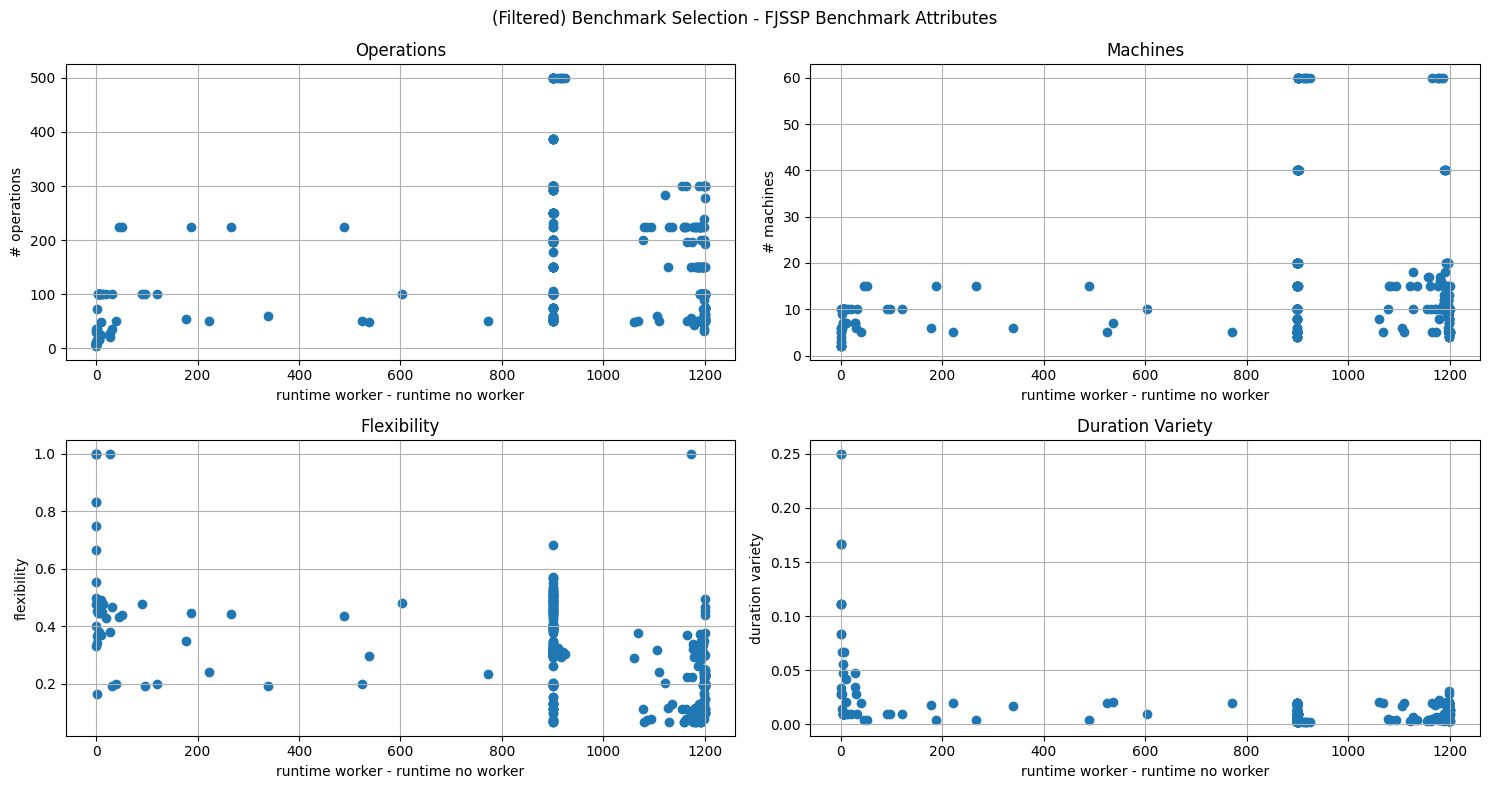

In [239]:
plot_runtime_difference(diff, o, m, f, dv, True)

In [240]:
diff, o, m, f, dv = get_diff(solver['ortools'], filter=True)

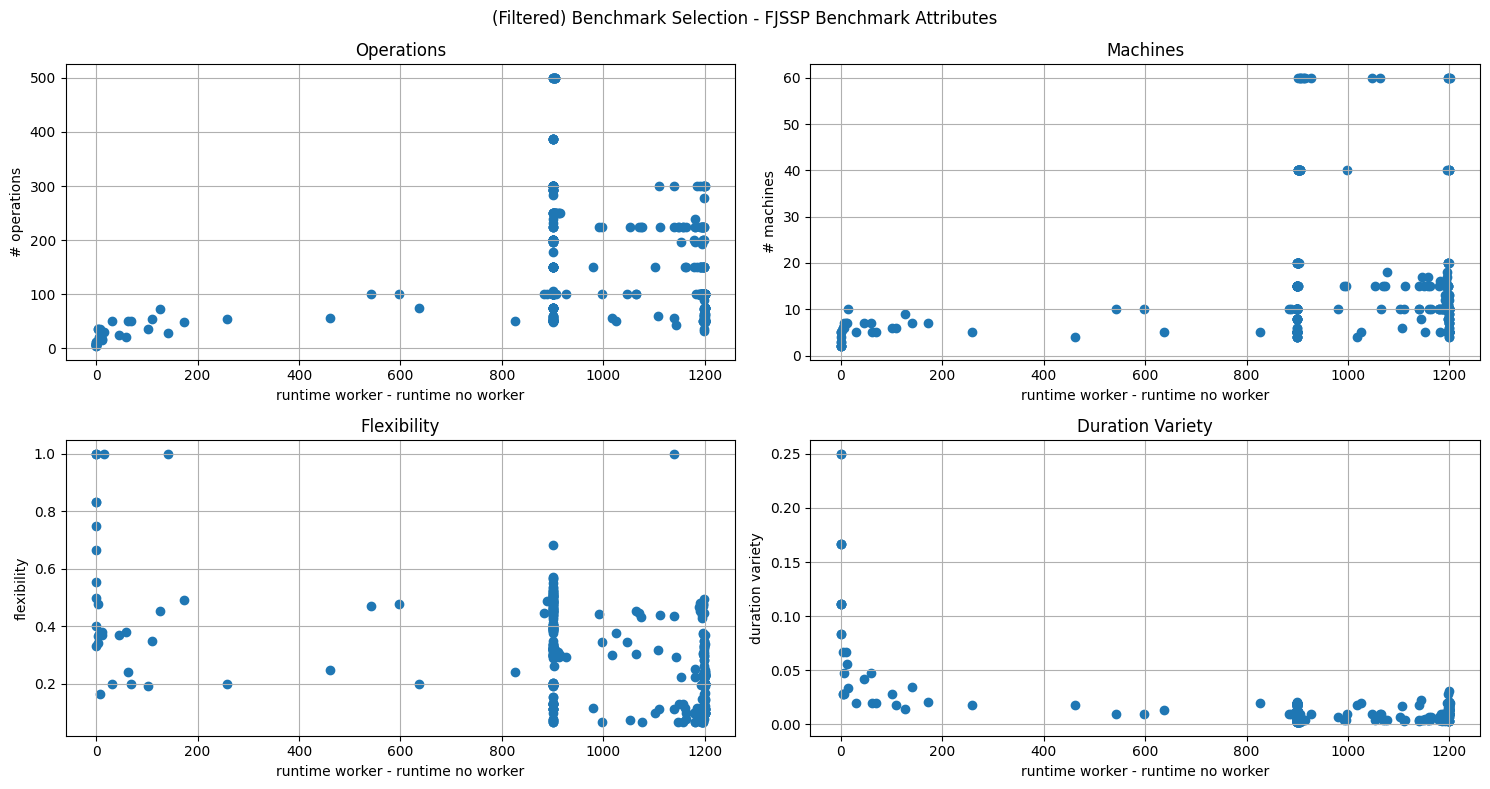

In [241]:
plot_runtime_difference(diff, o, m, f, dv, True)

In [242]:
def get_comparison(data, instance, column, max = False):
    best_fjssp = float('inf')
    best_fjssp_w = float('inf')
    for key in data.keys():
        if instance in data[key]['no_worker']:
            fitness_fjssp = data[key]['no_worker'][instance]['fitness']#optimizer['no_worker']['name'] == instance][column].tolist()[0]
            if fitness_fjssp < best_fjssp:
                best_fjssp = fitness_fjssp
        if instance in data[key]['worker']:
            fitness_fjssp_w = data[key]['worker'][instance]['fitness']#optimizer.loc[optimizer['worker']['name'] == instance][column].tolist()[0]
            if fitness_fjssp_w < best_fjssp_w:
                best_fjssp_w = fitness_fjssp_w
    return best_fjssp, best_fjssp_w

def calculate_value(fitness, best):
    return ((fitness - best) / best)

def get_best_fjssp(path = r'C:\Users\huda\Downloads\best_known_20250307.csv'):
    import csv
    result = dict()
    with open(path, 'r') as f:
        csv_data = csv.DictReader(f, delimiter=';')
        for data in csv_data:
            #print(data)
            #print(remap_full(data['Source']+'_'+data['Instance']))
            result[remap_full(data['Source']+'_'+data['Instance'])] = int(float(data['UB_ges']) + 0.5)
    return result

def get_cdf_comparison_vector(data : dict, column, max, instances, known_best = False, known_path = None):
    results = []
    if known_best:
        if known_path:
            all_best_fjssp = get_best_fjssp(known_path)
        else:
            all_best_fjssp = get_best_fjssp()
    for _ in data:
        results.append([[],[]])
    for instance in instances:
        best_fjssp, best_fjssp_w = get_comparison(data, instance, column, max)
        if known_best:
            best_fjssp = all_best_fjssp[instance]
        i = 0
        for key in data.keys():
            if instance in data[key]['no_worker']:
                results[i][0].append(calculate_value(data[key]['no_worker'][instance]['fitness'], best_fjssp))
            if instance in data[key]['worker']:
                results[i][1].append(calculate_value(data[key]['worker'][instance]['fitness'], best_fjssp_w))
            i += 1
    for result in results:
        result[0].sort()
        result[1].sort()
    return results

In [243]:
plt.rcParams['axes.grid'] = True
def ecdf_inf(data, column = 'fitness_value', max : bool = False, n_instances : int = 30, labels : list[str] = [], instances : list[str] = [], colors : list[str] = [], hlines : list = [], markers : list = [], markerson : list = [], known_best_fjssp = False):
    vectors = get_cdf_comparison_vector(data, column, max, instances, known_best_fjssp)
    plot_vectors = []

    for vector in vectors:
        plot_vectors.append([[[0.0],[0.0]], [[0.0],[0.0]]])
        i = 1
        while i < len(vector[0]):
            if vector[0][i] == float('inf'):
                break
            if vector[0][i] == -float('inf'):
                break
            while i < len(vector) and vector[i] == vector[i-1]:
                i += 1
            plot_vectors[-1][0][0].append(vector[0][i-1])
            plot_vectors[-1][0][1].append((i-1)/n_instances)
            i += 1
        i = 1
        while i < len(vector[1]):
            if vector[1][i] == float('inf'):
                break
            if vector[1][i] == -float('inf'):
                break
            while i < len(vector) and vector[i] == vector[i-1]:
                i += 1
            plot_vectors[-1][1][0].append(vector[1][i-1])
            plot_vectors[-1][1][1].append((i-1)/n_instances)
            i += 1
    fig = plt.figure(layout='tight', figsize=(5, 7))
    axs = fig.subplots(2)
    for i in range(len(vectors)):
        axs[0].plot(plot_vectors[i][0][0], plot_vectors[i][0][1], label=[labels[i]], c=colors[i], linestyle='solid', marker=markers[i], markevery=markerson)
    axs[0].set_title('FJSSP')
    if not known_best_fjssp:
        axs[0].set_xlim(-0.01, 0.7)
    else:
        axs[0].set_xlim(-0.25, 0.7)
    axs[0].set_xlabel('$\delta_{rel}$')
    axs[0].set_ylabel('Portion of instances $\leq \delta_{rel}$')
    axs[0].axhline(y=hlines[0], alpha=0.7, color='black', linestyle='dotted')#, label='optimal')
    axs[0].legend()
    for i in range(len(vectors)):
        axs[1].plot(plot_vectors[i][1][0], plot_vectors[i][1][1], label=[labels[i]], c=colors[i], marker=markers[i], markevery=markerson)
    axs[1].axhline(y=hlines[1], alpha=0.7, color='black', linestyle='dotted')#, label='optimal')
    axs[1].set_title('FJSSP-W')
    axs[1].set_xlabel('$\delta_{rel}$')
    axs[1].set_ylabel('Portion of instances $\leq \delta_{rel}$')
    axs[1].set_xlim(-0.01, 0.7)
    axs[1].legend()
    #for i in range(len(vectors)):
    #    plt.plot(plot_vectors[i][0][0], plot_vectors[i][0][1], label=[labels[i] + ' FJSSP'], c=colors[i], linestyle='dashed', alpha=0.7)
    #    plt.legend()
    #    plt.plot(plot_vectors[i][1][0], plot_vectors[i][1][1], label=[labels[i]+ ' FJSSP-W'], c=colors[i], alpha=0.7)
    #    plt.legend()
    #plt.xlim(-0.1, 1.0)
    plt.legend()
    #plt.title('FJSSP - FJSSP-W')
    plt.show()


In [244]:
optimal_instances = {'no_worker': [], 'worker': []}
for instance in solver['ga_best']['worker']:
    for s in solver:
        if s == 'cplex_cp' or s == 'ortools':
            if instance in solver[s]['no_worker']:
                if solver[s]['no_worker'][instance]['status'] == 1 and instance not in optimal_instances['no_worker']:
                        optimal_instances['no_worker'].append(instance)
            if instance in solver[s]['worker']:
                if solver[s]['worker'][instance]['status'] == 1 and instance not in optimal_instances['worker']:
                    optimal_instances['worker'].append(instance)

In [245]:
h_line_fjssp = len(optimal_instances['no_worker'])/len(solver['ga_best']['worker'])
h_line_fjssp_w = len(optimal_instances['worker'])/len(solver['ga_best']['worker'])

In [246]:
len(optimal_instances['no_worker'])

18

In [247]:
len(optimal_instances['worker'])

5

In [248]:
print(h_line_fjssp)
print(h_line_fjssp_w)

0.6
0.16666666666666666


In [249]:
filtered_instances = list(solver['cplex_cp']['worker'].keys())

In [250]:
solver['ga_best']['worker']

{'Behnke42': {'fitness': 80.0,
  'time_to_best': 571.7162471395881,
  'n_improvements': 46,
  'runtime': 1200},
 'Behnke46': {'fitness': 110.0,
  'time_to_best': 455.3159402805006,
  'n_improvements': 73,
  'runtime': 1200},
 'Behnke60': {'fitness': 491.0,
  'time_to_best': 802.0979020979021,
  'n_improvements': 110,
  'runtime': 1200},
 'BrandimarteMk12': {'fitness': 479.0,
  'time_to_best': 1140.5910583480677,
  'n_improvements': 97,
  'runtime': 1200},
 'BrandimarteMk14': {'fitness': 640.0,
  'time_to_best': 391.8744228993537,
  'n_improvements': 74,
  'runtime': 1200},
 'BrandimarteMk7': {'fitness': 143.0,
  'time_to_best': 628.0674846625767,
  'n_improvements': 77,
  'runtime': 1200},
 'ChambersBarnes10': {'fitness': 949.0,
  'time_to_best': 942.7052569403427,
  'n_improvements': 162,
  'runtime': 1200},
 'DPpaulli1': {'fitness': 2728.0,
  'time_to_best': 735.3346855983773,
  'n_improvements': 222,
  'runtime': 1200},
 'DPpaulli15': {'fitness': 2328.0,
  'time_to_best': 1017.984,


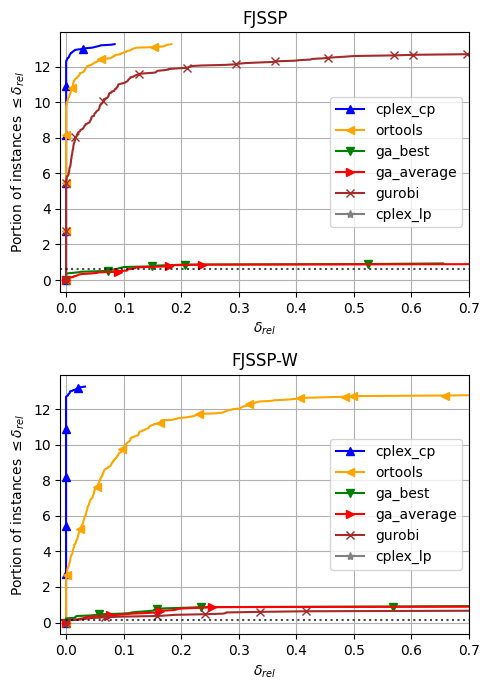

In [251]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
markers = ['^', '<', 'v', '>', 'x', '*', 'o']
markerson = 0.1#(0.0, 0.1)#[1, 2, 3]#list(range(0, 9))
ecdf_inf(solver, instances=filtered_instances, labels=list(solver.keys()), colors=['blue', 'orange', 'green', 'red', 'brown', 'grey', 'purple'], hlines=[h_line_fjssp, h_line_fjssp_w], markers=markers, markerson=markerson)
#ecdf_inf(solver['cplex_cp']['no_worker'], instances=filtered_instances)

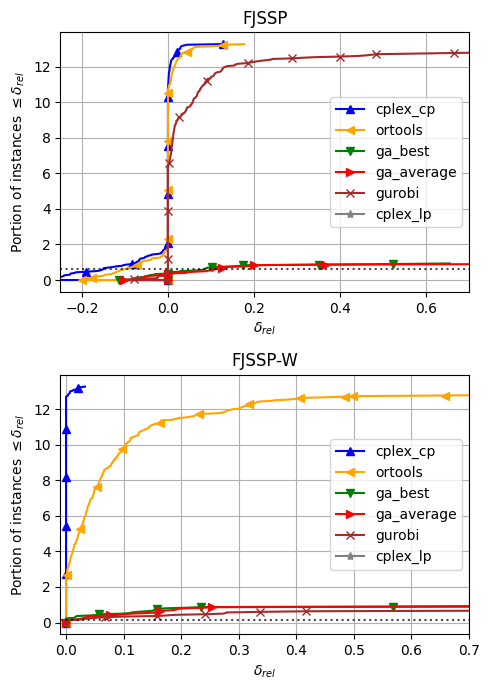

In [252]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
markers = ['^', '<', 'v', '>', 'x', '*', 'o']
markerson = 0.1#(0.0, 0.1)#[1, 2, 3]#list(range(0, 9))
ecdf_inf(solver, instances=filtered_instances, labels=list(solver.keys()), colors=['blue', 'orange', 'green', 'red', 'brown', 'grey', 'purple'], hlines=[h_line_fjssp, h_line_fjssp_w], markers=markers, markerson=markerson, known_best_fjssp=True)
#ecdf_inf(solver['cplex_cp']['no_worker'], instances=filtered_instances)

In [253]:
solver['cplex_cp']['worker']['HurinkSdata1']

{'fitness': 52.0,
 'lower_bound': 52.0,
 'status': 1.0,
 'runtime': 1.898,
 'time_to_best': 0.291,
 'n_improvements': 12}

In [254]:
solver['ortools']['worker']['HurinkSdata1']

{'fitness': 52.0,
 'lower_bound': 52.0,
 'status': 1.0,
 'runtime': 6.888768600000001,
 'time_to_best': 1.7384467000000001,
 'n_improvements': 22}

In [255]:
solver['ga_best']['worker']['HurinkSdata1']

{'fitness': 52.0,
 'time_to_best': 0.0572246,
 'n_improvements': 14,
 'runtime': 0.0572246}

In [256]:
def get_comparison(data, instance, column, max = False):
    best_fjssp = float('inf')
    best_fjssp_w = float('inf')
    for key in data.keys():
        if instance in data[key]['no_worker']:
            fitness_fjssp = data[key]['no_worker'][instance]['fitness']#optimizer['no_worker']['name'] == instance][column].tolist()[0]
            if fitness_fjssp < best_fjssp:
                best_fjssp = fitness_fjssp
            if instance in data[key]['worker']:
                fitness_fjssp_w = data[key]['worker'][instance]['fitness']#optimizer.loc[optimizer['worker']['name'] == instance][column].tolist()[0]
                if fitness_fjssp_w < best_fjssp_w:
                    best_fjssp_w = fitness_fjssp_w
    return best_fjssp, best_fjssp_w

def calculate_value(fitness, best):
    return ((fitness - best) / best)

def get_cdf_comparison_vector(data : dict, column, max, instances):
    results = []
    for _ in data:
        results.append([[],[]])
    for instance in instances:
        best_fjssp, best_fjssp_w = get_comparison(data, instance, column, max)
        i = 0
        for key in data.keys():
            if instance in data[key]['no_worker']:
                results[i][0].append(calculate_value(data[key]['no_worker'][instance]['fitness'], best_fjssp))
                if instance in data[key]['worker']:
                    results[i][1].append(calculate_value(data[key]['worker'][instance]['fitness'], best_fjssp_w))
                else:
                    results[i][1].append(float('inf'))
                i += 1
    for result in results:
        result[0].sort()
        result[1].sort()
    return results

def ecdf_inf(data, column = 'fitness_value', max : bool = False, n_instances : int = 30, labels : list[str] = [], instances : list[str] = [], colors : list[str] = []):
    vectors = get_cdf_comparison_vector(data, column, max, instances)
    plot_vectors = []

    for vector in vectors:
        plot_vectors.append([[[0.0],[0.0]], [[0.0],[0.0]]])
        i = 1
        while i < len(vector[0]):
            if vector[0][i] == float('inf'):
                break
            if vector[0][i] == -float('inf'):
                break
            while i < len(vector) and vector[i] == vector[i-1]:
                i += 1
            plot_vectors[-1][0][0].append(vector[0][i-1])
            plot_vectors[-1][0][1].append((i-1)/n_instances)
            i += 1
        i = 1
        while i < len(vector[1]):
            if vector[1][i] == float('inf'):
                break
            if vector[1][i] == -float('inf'):
                break
            while i < len(vector) and vector[i] == vector[i-1]:
                i += 1
            plot_vectors[-1][1][0].append(vector[1][i-1])
            plot_vectors[-1][1][1].append((i-1)/n_instances)
            i += 1
    for i in range(len(vectors)):
        plt.plot(plot_vectors[i][0][0], plot_vectors[i][0][1], label=[labels[i] + ' FJSSP'], c=colors[i], linestyle='dashed', alpha=0.7)
        plt.plot(plot_vectors[i][1][0], plot_vectors[i][1][1], label=[labels[i]+ ' FJSSP-W'], c=colors[i], alpha=0.7)
        shrink = min(len(plot_vectors[i][1][1]),len(plot_vectors[i][0][1]))
        plt.fill_between(plot_vectors[i][1][0], plot_vectors[i][1][1][:shrink], plot_vectors[i][0][1][:shrink], alpha=0.2)
    plt.legend()
    plt.xlim(-0.1, 1.0)
    plt.xlabel('$\delta_{rel}$')
    plt.ylabel('Portion of instances within Gap')
    plt.legend()
    plt.title('FJSSP - FJSSP-W Relative Performance')
    plt.show()


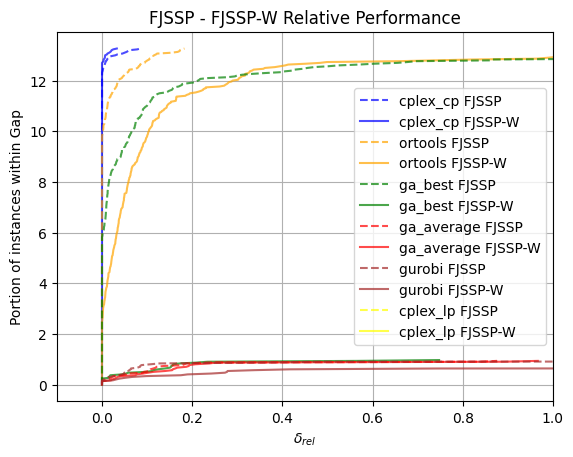

In [257]:
ecdf_inf(solver, instances=filtered_instances, labels=list(solver.keys()), colors=['blue', 'orange', 'green', 'red', 'brown', 'yellow', 'purple'])

In [258]:
cp_fjssp
cp_fjssp_w
ga_best_fjssp
ga_best_fjssp_w

{'Behnke42': 80.0,
 'Behnke46': 110.0,
 'Behnke60': 491.0,
 'BrandimarteMk12': 479.0,
 'BrandimarteMk14': 640.0,
 'BrandimarteMk7': 143.0,
 'ChambersBarnes10': 949.0,
 'DPpaulli1': 2728.0,
 'DPpaulli15': 2328.0,
 'DPpaulli18': 2305.0,
 'DPpaulli9': 2270.0,
 'Fattahi14': 538.0,
 'Fattahi20': 1208.0,
 'HurinkEdata1': 51.0,
 'HurinkEdata6': 601.0,
 'HurinkRdata28': 909.0,
 'HurinkRdata38': 1780.0,
 'HurinkRdata50': 5791.0,
 'HurinkSdata1': 52.0,
 'HurinkSdata38': 2005.0,
 'HurinkSdata40': 1640.0,
 'HurinkSdata54': 7954.0,
 'HurinkSdata61': 1468.0,
 'HurinkSdata63': 605.0,
 'HurinkSdata8': 565.0,
 'HurinkVdata18': 1827.0,
 'HurinkVdata30': 1178.0,
 'HurinkVdata5': 580.0,
 'Kacem3': 7.0,
 'Kacem4': 11.0}

In [259]:
fjssp_ga_win = 0
fjssp_tie = 0
fjssp_cp_win = 0
for instance in solver['ga_best']['no_worker']:
    if instance in solver['cplex_cp']['no_worker']:
        if solver['cplex_cp']['no_worker'][instance]['fitness'] < solver['ga_best']['no_worker'][instance]['fitness']:
            fjssp_cp_win += 1
        elif solver['cplex_cp']['no_worker'][instance]['fitness'] == solver['ga_best']['no_worker'][instance]['fitness']:
            fjssp_tie += 1
        else:
            fjssp_ga_win += 1
    else:
        fjssp_ga_win += 1

fjssp_w_ga_win = 0
fjssp_w_tie = 0
fjssp_w_cp_win = 0
for instance in solver['ga_best']['worker']:
    if instance in solver['cplex_cp']['worker']:
        if solver['cplex_cp']['worker'][instance]['fitness'] < solver['ga_best']['worker'][instance]['fitness']:
            fjssp_w_cp_win += 1
        elif solver['cplex_cp']['worker'][instance]['fitness'] == solver['ga_best']['worker'][instance]['fitness']:
            fjssp_w_tie += 1
        else:
            fjssp_w_ga_win += 1
    else:
        fjssp_w_ga_win += 1

In [260]:
print(fjssp_w_ga_win)

2


In [261]:
2/30*100

6.666666666666667

In [262]:
best_fjssp = dict()
best_fjssp_w = dict()
for instance in solver['ga_best']['worker']:
    best_fjssp[instance] = float('inf')
    best_fjssp_w[instance] = float('inf')
    for s in solver:
        if instance in solver[s]['no_worker']:
            if solver[s]['no_worker'][instance]['fitness'] < best_fjssp[instance]:
                best_fjssp[instance] = solver[s]['no_worker'][instance]['fitness']
        if instance in solver[s]['worker']:
            if solver[s]['worker'][instance]['fitness'] < best_fjssp_w[instance]:
                best_fjssp_w[instance] = solver[s]['worker'][instance]['fitness']
gaps = dict()
for s in solver:
    gaps[s] = {'worker': dict(), 'no_worker': dict()}


In [263]:
for instance in solver['ga_best']['worker']:
    for s in solver:
        if instance in solver[s]['no_worker']:
            gap_fjssp = calculate_value(solver[s]['no_worker'][instance]['fitness'], best_fjssp[instance])
        if instance in solver[s]['worker']:
            gap_fjssp_w = calculate_value(solver[s]['worker'][instance]['fitness'], best_fjssp_w[instance])
        gaps[s]['worker'][instance] = gap_fjssp_w
        gaps[s]['no_worker'][instance] = gap_fjssp


In [264]:
average_gaps = dict()
for s in solver:
    avg_fjssp = 0
    avg_fjssp_w = 0
    for instance in gaps[s]['worker']:
        avg_fjssp_w += gaps[s]['worker'][instance]
    for instance in gaps[s]['no_worker']:
        avg_fjssp += gaps[s]['no_worker'][instance]
    avg_fjssp_w /= len(gaps[s]['worker'])
    avg_fjssp /= len(gaps[s]['no_worker'])
    average_gaps[s] = {'fjssp': avg_fjssp, 'fjssp_w': avg_fjssp_w}


In [265]:
average_gaps

{'cplex_cp': {'fjssp': 0.01937881863952338, 'fjssp_w': 0.0029725357054503085},
 'ortools': {'fjssp': 0.028787700007385043, 'fjssp_w': 0.06415449951946939},
 'ga_best': {'fjssp': 0.10882708017999822, 'fjssp_w': 0.13710383114875624},
 'ga_average': {'fjssp': 0.1550949884069075, 'fjssp_w': 0.1849905588467677},
 'gurobi': {'fjssp': 0.46176945270361336, 'fjssp_w': 0.5543004076446097},
 'cplex_lp': {'fjssp': 0.46176945270361336, 'fjssp_w': 0.5543004076446097}}

In [266]:
def get_gaps_below(data, value):
    fjssp = 0
    fjssp_w = 0
    for instance in data['no_worker']:
        if data['no_worker'][instance] <= value:
            fjssp+=1
    for instance in data['worker']:
        if data['worker'][instance] <= value:
            fjssp_w+=1
    return fjssp, fjssp_w

In [267]:
def print_gaps(data, value):
    print(f'Gap <= {value}')
    for s in data:
        fjssp, fjssp_w = get_gaps_below(data[s], value)
        print(f'{s}: FJSSP: {fjssp} ({(fjssp/30)*100}%), FJSSP-W: {fjssp_w} ({(fjssp_w/30)*100}%)')

In [268]:
print_gaps(gaps, 0)
print_gaps(gaps, 0.05)
print_gaps(gaps, 0.1)
print_gaps(gaps, 0.2)

Gap <= 0
cplex_cp: FJSSP: 17 (56.666666666666664%), FJSSP-W: 23 (76.66666666666667%)
ortools: FJSSP: 11 (36.666666666666664%), FJSSP-W: 6 (20.0%)
ga_best: FJSSP: 11 (36.666666666666664%), FJSSP-W: 5 (16.666666666666664%)
ga_average: FJSSP: 4 (13.333333333333334%), FJSSP-W: 2 (6.666666666666667%)
gurobi: FJSSP: 6 (20.0%), FJSSP-W: 6 (20.0%)
cplex_lp: FJSSP: 6 (20.0%), FJSSP-W: 6 (20.0%)
Gap <= 0.05
cplex_cp: FJSSP: 24 (80.0%), FJSSP-W: 30 (100.0%)
ortools: FJSSP: 21 (70.0%), FJSSP-W: 18 (60.0%)
ga_best: FJSSP: 15 (50.0%), FJSSP-W: 13 (43.333333333333336%)
ga_average: FJSSP: 12 (40.0%), FJSSP-W: 11 (36.666666666666664%)
gurobi: FJSSP: 15 (50.0%), FJSSP-W: 11 (36.666666666666664%)
cplex_lp: FJSSP: 15 (50.0%), FJSSP-W: 11 (36.666666666666664%)
Gap <= 0.1
cplex_cp: FJSSP: 30 (100.0%), FJSSP-W: 30 (100.0%)
ortools: FJSSP: 29 (96.66666666666667%), FJSSP-W: 24 (80.0%)
ga_best: FJSSP: 22 (73.33333333333333%), FJSSP-W: 16 (53.333333333333336%)
ga_average: FJSSP: 16 (53.333333333333336%), FJSSP-W

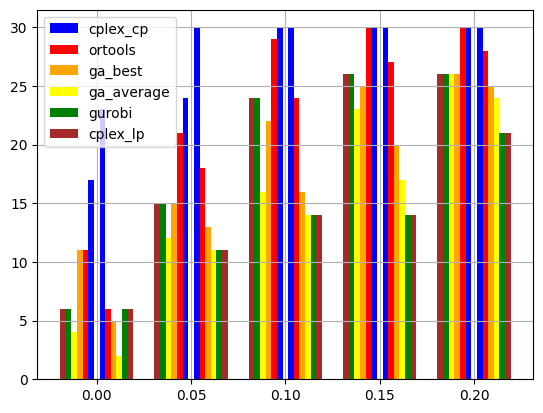

In [269]:
gap_values = [0.0, 0.05, 0.1, 0.15, 0.2]
# fjssp
colors = ['blue', 'red', 'orange', 'yellow', 'green', 'brown', 'purple']
i = 1
for s in solver:
    fjssp = []
    fjssp_w = []
    for gap in gap_values:
        nw, w = get_gaps_below(gaps[s], gap)
        fjssp.append(nw)
        fjssp_w.append(w)
    offset = 0.003
    x_fjssp = [value -(offset*i) for value in gap_values]
    plt.bar(x_fjssp, fjssp, width=0.003, color=colors[i-1], capstyle='round')
    x_fjssp_w = [value+(offset*i) for value in gap_values]
    plt.bar(x_fjssp_w, fjssp_w, width=0.003, label=s, color=colors[i-1])
    i+=1
plt.legend()
plt.show()

In [270]:
from benchmarkrewriter.benchmark_parser import BenchmarkParser, WorkerBenchmarkParser, WorkerEncoding
def worker_flexibility(benchmark : WorkerEncoding):
    n_assignments = 0
    m = benchmark.n_machines()
    o = benchmark.n_operations()
    durations = benchmark.durations()
    w = durations.shape[2]
    for i in range(len(durations)):
        for j in range(len(durations[i])):
            for k in range(len(durations[i][j])):
                if durations[i][j][k] > 0:
                    n_assignments += 1
    average_assignments = n_assignments / o
    return average_assignments / (m*w)

def get_flexibility_and_dv_worker(benchmark):
    all = 0
    unique = []
    machines_available = 0
    durations = benchmark.durations()
    for i in range(len(durations)):
        for j in range(len(durations[i])):
            for k in range(len(durations[i][j])):
                if durations[i][j][k] > 0:
                    if durations[i][j][k] not in unique:
                        unique.append(durations[i][j][k])
                    all += 1
            if any([x > 0 for x in durations[i][j]]):
                machines_available+=1
    #return (machines_available / len(durations)) / benchmark.n_machines(), len(unique) / all
    return worker_flexibility(benchmark), len(unique) / all

def get_max(durations):
    max = 0
    for operation in durations:
        for machine in operation:
            for worker in machine:
                if worker > max:
                    max = worker
    return max

def read_benchmarks_workers(path):
    result = dict()
    benchmarks = os.listdir(path)
    for benchmark in benchmarks:
        #parser = BenchmarkParser()
        parser = WorkerBenchmarkParser()
        data = parser.parse_benchmark(path + '/' + benchmark)
        #f, dv = get_flexibility_and_dv(data)
        f, dv = get_flexibility_and_dv_worker(data)
        instance_name = remap(benchmark[2:-12])
        metrics = dict()

        max_duration = get_max(data.durations())
        counts = [0] * (max_duration+1)
        for operation in data.durations():
            for machine in operation:
                for worker in machine:
                    if worker > 0:
                        counts[worker] += 1
        d_distinct = [x for x in range(len(counts)) if counts[x] > 0]
        d_unique = [x for x in range(len(counts)) if counts[x] == 1]
        d_shared = [x for x in range(len(counts)) if counts[x] > 1]
        metrics['d_distinct'] = d_distinct
        metrics['d_unique'] = d_unique
        metrics['d_shared'] = d_shared
        metrics['d_average'] = sum(counts)/data.n_operations()
        result[instance_name] = {'n_operations': data.n_operations(), 'flexibility': f, 'duration_variety': dv, 'n_machines': data.n_machines(), 'additional_metrics': metrics}

    return result

In [271]:
fjssp_w_benchmarks = r'C:\Users\huda\Downloads\selected_benchmarks\fjssp-w'
benchmark_data = read_benchmarks_workers(fjssp_w_benchmarks)

In [272]:
instances_ga_win = []
instances_ga_tie = []
instances_cp_win = []
for instance in solver['ga_best']['worker']:
    if instance in solver['cplex_cp']['worker']:
        if solver['cplex_cp']['worker'][instance]['fitness'] < solver['ga_best']['worker'][instance]['fitness']:
            instances_cp_win.append(instance)
        elif solver['cplex_cp']['worker'][instance]['fitness'] == solver['ga_best']['worker'][instance]['fitness']:
            instances_ga_tie.append(instance)
        else: 
            instances_ga_win.append(instance)
    else:
        instances_ga_win.append(instance)

In [273]:
ga_attributes = {'f': [], 'o': [], 'm': [], 'dv': []}
cp_attributes = {'f': [], 'o': [], 'm': [], 'dv': []}
tied_attributes = {'f': [], 'o': [], 'm': [], 'dv': []}

for instance in instances_ga_win:
    ga_attributes['f'].append(benchmark_data[instance]['flexibility'])
    ga_attributes['o'].append(benchmark_data[instance]['n_operations'])
    ga_attributes['m'].append(benchmark_data[instance]['n_machines'])
    ga_attributes['dv'].append(benchmark_data[instance]['duration_variety'])
for instance in instances_ga_tie:
    tied_attributes['f'].append(benchmark_data[instance]['flexibility'])
    tied_attributes['o'].append(benchmark_data[instance]['n_operations'])
    tied_attributes['m'].append(benchmark_data[instance]['n_machines'])
    tied_attributes['dv'].append(benchmark_data[instance]['duration_variety'])
for instance in instances_cp_win:
    cp_attributes['f'].append(benchmark_data[instance]['flexibility'])
    cp_attributes['o'].append(benchmark_data[instance]['n_operations'])
    cp_attributes['m'].append(benchmark_data[instance]['n_machines'])
    cp_attributes['dv'].append(benchmark_data[instance]['duration_variety'])

In [274]:
import statistics
def print_data(data):
    o = statistics.mean(data['o'])
    os = statistics.stdev(data['o'])
    f = statistics.mean(data['f'])
    fs = statistics.stdev(data['f'])
    m = statistics.mean(data['m'])
    ms = statistics.stdev(data['m'])
    dv = statistics.mean(data['dv'])
    dvs = statistics.stdev(data['dv'])
    print(f'#Operations: {o} | {os}\n#Machines: {m} | {ms}\nFlexibility: {f} | {fs}\nDuration Variety: {dv} | {dvs}')

In [275]:
print('GA')
print_data(ga_attributes)
print('CP')
print_data(cp_attributes)
print('TIE')
print_data(tied_attributes)

GA
#Operations: 61 | 15.556349186104045
#Machines: 34.5 | 36.062445840513924
Flexibility: 0.09855807217473884 | 0.0530923034881162
Duration Variety: 0.3660989186867103 | 0.5167799273933311
CP
#Operations: 189.52380952380952 | 128.87614947988592
#Machines: 13.476190476190476 | 15.730921929814055
Flexibility: 0.1686979727584002 | 0.10165386995649085
Duration Variety: 0.1055952310527129 | 0.17206174803102736
TIE
#Operations: 72.28571428571429 | 91.03243796529213
#Machines: 8.428571428571429 | 3.5050983275386565
Flexibility: 0.23610286513854462 | 0.20835593798327018
Duration Variety: 0.14234073037548228 | 0.20183096527159172


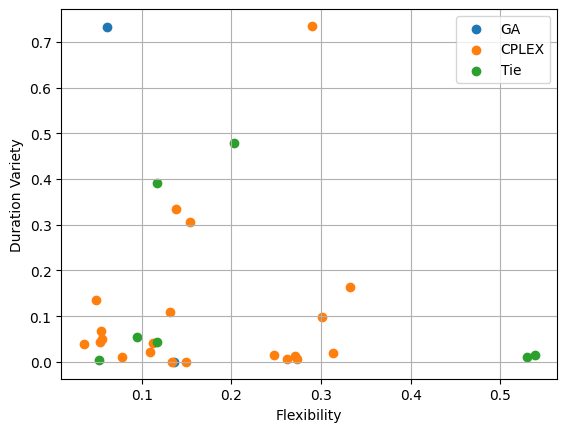

In [276]:
x_ga = [x for x in ga_attributes['f']]
y_ga = [y for y in ga_attributes['dv']]
x_cp = [x for x in cp_attributes['f']]
y_cp = [y for y in cp_attributes['dv']]
x_tied = [x for x in tied_attributes['f']]
y_tied = [y for y in tied_attributes['dv']]
plt.scatter(x_ga, y_ga, label='GA')
plt.scatter(x_cp, y_cp, label='CPLEX')
plt.scatter(x_tied, y_tied, label='Tie')
plt.xlabel('Flexibility')
plt.ylabel('Duration Variety')
plt.legend()
plt.show()

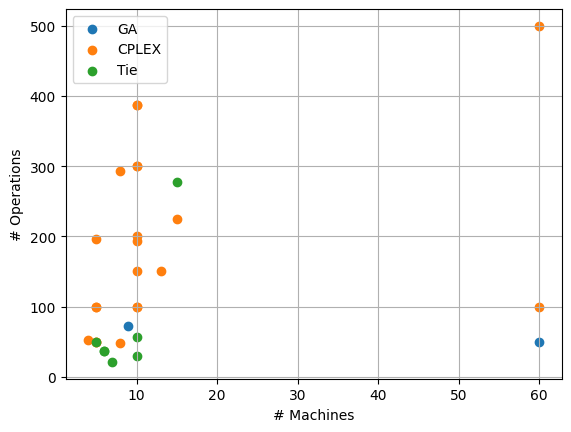

In [277]:
x_ga = [x for x in ga_attributes['m']]
y_ga = [y for y in ga_attributes['o']]
x_cp = [x for x in cp_attributes['m']]
y_cp = [y for y in cp_attributes['o']]
x_tied = [x for x in tied_attributes['m']]
y_tied = [y for y in tied_attributes['o']]
plt.scatter(x_ga, y_ga, label='GA')
plt.scatter(x_cp, y_cp, label='CPLEX')
plt.scatter(x_tied, y_tied, label='Tie')
plt.xlabel('# Machines')
plt.ylabel('# Operations')
plt.legend()
plt.show()

In [278]:
def get_gap_instances(data, value):
    result = []
    for instance in data['worker']:
        if data['worker'][instance] <= value:
            result.append(instance)
    return result

In [279]:
def plot_in_gap(s):
    v1=get_gap_instances(s, 0)
    v2=get_gap_instances(s, 0.05)
    v3=get_gap_instances(s, 0.1)
    v4=get_gap_instances(s, 0.15)
    v5=get_gap_instances(s, 0.2)
    v6=get_gap_instances(s, 1.0)
    v2 = [x for x in v2 if x not in v1]
    v3 = [x for x in v3 if x not in v1 and x not in v2]
    v4 = [x for x in v4 if x not in v1 and x not in v2 and x not in v3]
    v5 = [x for x in v5 if x not in v1 and x not in v2 and x not in v3 and x not in v4]
    all = [v1, v2, v3, v4, v5]
    gaps_label=['0%', '5%', '10%', '15%', '20%']
    attributes = dict()
    for i in range(len(gaps_label)):
        attributes[gaps_label[i]] = {
        'f': [benchmark_data[x]['flexibility'] for x in all[i]],
        'dv': [benchmark_data[x]['duration_variety'] for x in all[i]],
        'o': [benchmark_data[x]['n_operations'] for x in all[i]],
        'm': [benchmark_data[x]['additional_metrics']['d_average'] for x in all[i]],
        }
    marker = ['.', '1', '2', '3', '4']
    for i in range(len(gaps_label)):
        x = [x for x in attributes[gaps_label[i]]['f']]
        y = [y for y in attributes[gaps_label[i]]['dv']]
        plt.scatter(x, y, label=gaps_label[i], marker=marker[i])
    plt.xlabel('Flexibility')
    plt.ylabel('Duration Variety')
    plt.title('Attributes of instances $\leq \delta_{rel}$')
    plt.legend()
    plt.show()
    for i in range(len(gaps_label)):
        x = [x for x in attributes[gaps_label[i]]['m']]
        y = [y for y in attributes[gaps_label[i]]['o']]
        plt.scatter(x, y, label=gaps_label[i], marker=marker[i])
    plt.xlabel('$d_{average}$')
    plt.ylabel('# Operations')
    plt.title('Attributes of instances $\leq \delta_{rel}$')
    plt.legend()
    plt.show()

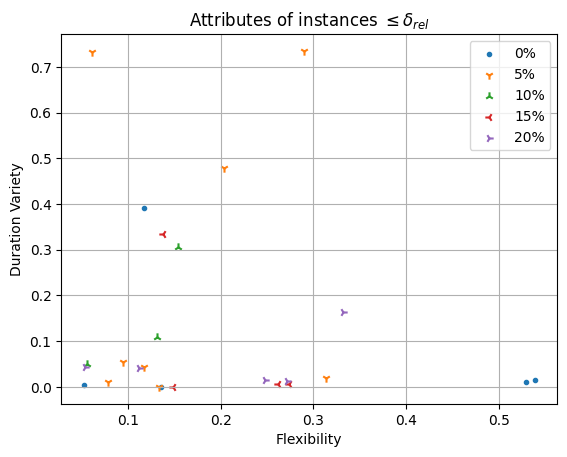

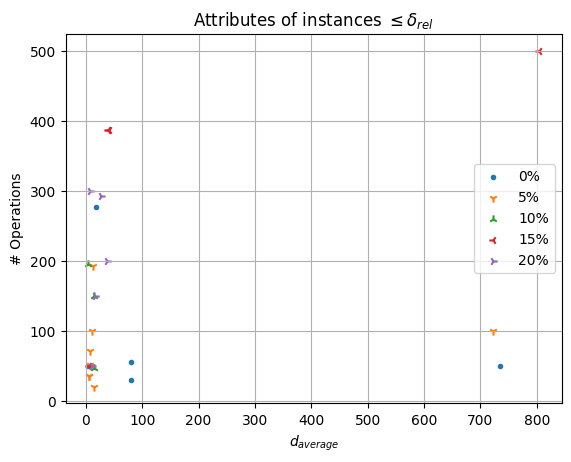

In [280]:
plot_in_gap(gaps['ga_best'])

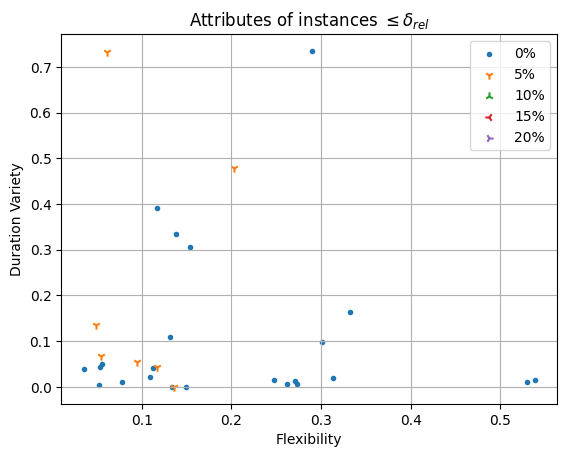

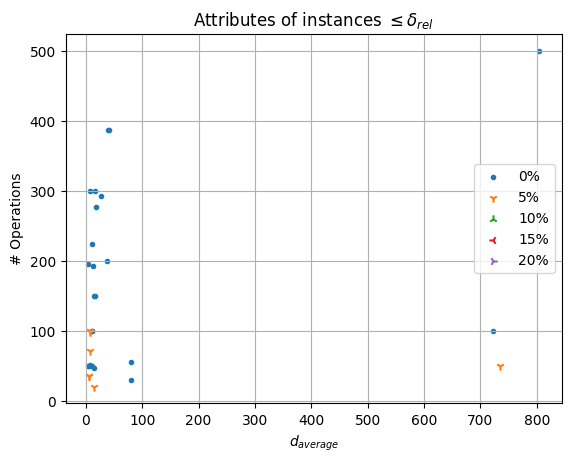

In [281]:
plot_in_gap(gaps['cplex_cp'])

In [282]:
instance_data.keys()

dict_keys(['Behnke1', 'Behnke10', 'Behnke11', 'Behnke12', 'Behnke13', 'Behnke14', 'Behnke15', 'Behnke16', 'Behnke17', 'Behnke18', 'Behnke19', 'Behnke2', 'Behnke20', 'Behnke21', 'Behnke22', 'Behnke23', 'Behnke24', 'Behnke25', 'Behnke26', 'Behnke27', 'Behnke28', 'Behnke29', 'Behnke3', 'Behnke30', 'Behnke31', 'Behnke32', 'Behnke33', 'Behnke34', 'Behnke35', 'Behnke36', 'Behnke37', 'Behnke38', 'Behnke39', 'Behnke4', 'Behnke40', 'Behnke41', 'Behnke42', 'Behnke43', 'Behnke44', 'Behnke45', 'Behnke46', 'Behnke47', 'Behnke48', 'Behnke49', 'Behnke5', 'Behnke50', 'Behnke51', 'Behnke52', 'Behnke53', 'Behnke54', 'Behnke55', 'Behnke56', 'Behnke57', 'Behnke58', 'Behnke59', 'Behnke6', 'Behnke60', 'Behnke7', 'Behnke8', 'Behnke9', 'BrandimarteMk1', 'BrandimarteMk10', 'BrandimarteMk11', 'BrandimarteMk12', 'BrandimarteMk13', 'BrandimarteMk14', 'BrandimarteMk15', 'BrandimarteMk2', 'BrandimarteMk3', 'BrandimarteMk4', 'BrandimarteMk5', 'BrandimarteMk6', 'BrandimarteMk7', 'BrandimarteMk8', 'BrandimarteMk9', 'C

In [283]:
benchmark_data.keys()

dict_keys(['Behnke10', 'Behnke11', 'Behnke12', 'Behnke13', 'Behnke14', 'Behnke15', 'Behnke16', 'Behnke17', 'Behnke18', 'Behnke19', 'Behnke1', 'Behnke20', 'Behnke21', 'Behnke22', 'Behnke23', 'Behnke24', 'Behnke25', 'Behnke26', 'Behnke27', 'Behnke28', 'Behnke29', 'Behnke2', 'Behnke30', 'Behnke31', 'Behnke32', 'Behnke33', 'Behnke34', 'Behnke35', 'Behnke36', 'Behnke37', 'Behnke38', 'Behnke39', 'Behnke3', 'Behnke40', 'Behnke41', 'Behnke42', 'Behnke43', 'Behnke44', 'Behnke45', 'Behnke46', 'Behnke47', 'Behnke48', 'Behnke49', 'Behnke4', 'Behnke50', 'Behnke51', 'Behnke52', 'Behnke53', 'Behnke54', 'Behnke55', 'Behnke56', 'Behnke57', 'Behnke58', 'Behnke59', 'Behnke5', 'Behnke60', 'Behnke6', 'Behnke7', 'Behnke8', 'Behnke9', 'BrandimarteMk10', 'BrandimarteMk11', 'BrandimarteMk12', 'BrandimarteMk13', 'BrandimarteMk14', 'BrandimarteMk15', 'BrandimarteMk1', 'BrandimarteMk2', 'BrandimarteMk3', 'BrandimarteMk4', 'BrandimarteMk5', 'BrandimarteMk6', 'BrandimarteMk7', 'BrandimarteMk8', 'BrandimarteMk9', 'H

In [284]:
instance_data['Behnke10'].keys()

dict_keys(['name', 'n_jobs', 'n_machines', 'n_operations', 'durations', 'job_sequence', 'machines_for_all_operations', 'flexibility', 'duration_variety', 'average_operations', 'min_duration', 'max_duration', 'duration_span', 'duration_std'])

In [285]:
benchmark_data['Behnke10'].keys()

dict_keys(['n_operations', 'flexibility', 'duration_variety', 'n_machines', 'additional_metrics'])

In [286]:
benchmark_data['Behnke10']['additional_metrics'].keys()

dict_keys(['d_distinct', 'd_unique', 'd_shared', 'd_average'])

In [287]:
benchmark_data['Behnke10']['additional_metrics']['d_average']

94.96

In [288]:
len(instance_data)

402

In [289]:
len(benchmark_data)

402

In [290]:
def get_stats(instances):
    o = [] 
    m = []
    f = []
    dv = []
    a = []
    for instance in instances:
        o.append(instances[instance]['n_operations'])
        m.append(instances[instance]['n_machines'])
        f.append(instances[instance]['flexibility'])
        dv.append(instances[instance]['duration_variety'])
        if 'additional_metrics' not in instances[instance]:
            durations = instances[instance]['durations']
            count = 0
            for operation in durations:
                for machine in operation:
                    for worker in machine:
                        if worker > 0:
                            count+=1
            a.append(count/instances[instance]['n_operations'])
        else:
            a.append(instances[instance]['additional_metrics']['d_average'])
    o_stdev = statistics.stdev(o)
    o_mean = statistics.mean(o)
    a_stdev = statistics.stdev(a)
    a_mean = statistics.mean(a)
    m_stdev = statistics.stdev(m)
    m_mean = statistics.mean(m)
    f_stdev = statistics.stdev(f)
    f_mean = statistics.mean(f)
    dv_stdev = statistics.stdev(dv)
    dv_mean = statistics.mean(dv)
    return {'operations': (o_mean, o_stdev), 'avg_assignments': (a_mean, a_stdev), 'machines': (m_mean, m_stdev), 'flexibility': (f_mean, f_stdev), 'duration_variety': (dv_mean, dv_stdev)}


In [291]:
get_stats(benchmark_data)

{'operations': (150.1144278606965, 111.25729807459317),
 'avg_assignments': (79.25444761989125, 194.64364903217316),
 'machines': (13.512437810945274, 13.16672654108999),
 'flexibility': (0.15424661137601514, 0.10544508689433547),
 'duration_variety': (0.14964255090141335, 0.22412826718150225)}

In [292]:
selected_benchmarks = dict()
for instance in solver['ga_best']['worker']:
    selected_benchmarks[instance] = benchmark_data[instance]

In [293]:
get_stats(selected_benchmarks)

{'operations': (153.6, 127.66864438310877),
 'avg_assignments': (92.54880507745501, 225.2259831327517),
 'machines': (13.7, 15.957162482182056),
 'flexibility': (0.1797497876081898, 0.13234503353898672),
 'duration_variety': (0.1315360934036256, 0.20582625261673534)}

In [294]:
solver['cplex_lp']['worker']

{}

In [295]:
solver['cplex_cp']['no_worker']

{'Behnke1': {'fitness': 90.0,
  'lower_bound': 89.0,
  'status': 1.0,
  'runtime': 3.988,
  'time_to_best': 3.984,
  'n_improvements': 21},
 'Behnke10': {'fitness': 128.0,
  'lower_bound': 89.0,
  'status': 0.0,
  'runtime': 300.004,
  'time_to_best': 39.259,
  'n_improvements': 27},
 'Behnke11': {'fitness': 234.0,
  'lower_bound': 86.0,
  'status': 0.0,
  'runtime': 300.039,
  'time_to_best': 135.077,
  'n_improvements': 44},
 'Behnke12': {'fitness': 225.0,
  'lower_bound': 83.0,
  'status': 0.0,
  'runtime': 300.052,
  'time_to_best': 295.059,
  'n_improvements': 47},
 'Behnke13': {'fitness': 235.0,
  'lower_bound': 84.0,
  'status': 0.0,
  'runtime': 300.051,
  'time_to_best': 292.876,
  'n_improvements': 57},
 'Behnke14': {'fitness': 237.0,
  'lower_bound': 90.0,
  'status': 0.0,
  'runtime': 300.044,
  'time_to_best': 278.067,
  'n_improvements': 39},
 'Behnke15': {'fitness': 234.0,
  'lower_bound': 86.0,
  'status': 0.0,
  'runtime': 300.053,
  'time_to_best': 280.697,
  'n_impro

In [296]:
solver['cplex_cp']['worker']

{'Behnke10': {'fitness': 125.0,
  'lower_bound': 76.0,
  'status': 0.0,
  'runtime': 1200.18,
  'time_to_best': 547.414,
  'n_improvements': 28},
 'Behnke11': {'fitness': 228.0,
  'lower_bound': 74.0,
  'status': 0.0,
  'runtime': 1200.27,
  'time_to_best': 794.844,
  'n_improvements': 26},
 'Behnke12': {'fitness': 223.0,
  'lower_bound': 72.0,
  'status': 0.0,
  'runtime': 1200.27,
  'time_to_best': 446.612,
  'n_improvements': 39},
 'Behnke13': {'fitness': 234.0,
  'lower_bound': 76.0,
  'status': 0.0,
  'runtime': 1200.07,
  'time_to_best': 535.253,
  'n_improvements': 50},
 'Behnke14': {'fitness': 238.0,
  'lower_bound': 82.0,
  'status': 0.0,
  'runtime': 1200.28,
  'time_to_best': 327.779,
  'n_improvements': 30},
 'Behnke15': {'fitness': 233.0,
  'lower_bound': 80.0,
  'status': 0.0,
  'runtime': 1200.12,
  'time_to_best': 464.936,
  'n_improvements': 36},
 'Behnke16': {'fitness': 416.0,
  'lower_bound': 80.0,
  'status': 0.0,
  'runtime': 1200.66,
  'time_to_best': 1064.71,
  '

In [297]:
solver['ga_best']['worker']

{'Behnke42': {'fitness': 80.0,
  'time_to_best': 571.7162471395881,
  'n_improvements': 46,
  'runtime': 1200},
 'Behnke46': {'fitness': 110.0,
  'time_to_best': 455.3159402805006,
  'n_improvements': 73,
  'runtime': 1200},
 'Behnke60': {'fitness': 491.0,
  'time_to_best': 802.0979020979021,
  'n_improvements': 110,
  'runtime': 1200},
 'BrandimarteMk12': {'fitness': 479.0,
  'time_to_best': 1140.5910583480677,
  'n_improvements': 97,
  'runtime': 1200},
 'BrandimarteMk14': {'fitness': 640.0,
  'time_to_best': 391.8744228993537,
  'n_improvements': 74,
  'runtime': 1200},
 'BrandimarteMk7': {'fitness': 143.0,
  'time_to_best': 628.0674846625767,
  'n_improvements': 77,
  'runtime': 1200},
 'ChambersBarnes10': {'fitness': 949.0,
  'time_to_best': 942.7052569403427,
  'n_improvements': 162,
  'runtime': 1200},
 'DPpaulli1': {'fitness': 2728.0,
  'time_to_best': 735.3346855983773,
  'n_improvements': 222,
  'runtime': 1200},
 'DPpaulli15': {'fitness': 2328.0,
  'time_to_best': 1017.984,


In [298]:
solver['ga_best']['no_worker']

{'Behnke42': {'fitness': 80.0,
  'time_to_best': 118.12057047860705,
  'n_improvements': 34,
  'runtime': 1200},
 'Behnke46': {'fitness': 110.0,
  'time_to_best': 287.4676230324766,
  'n_improvements': 59,
  'runtime': 1200},
 'Behnke60': {'fitness': 491.0,
  'time_to_best': 950.412677451304,
  'n_improvements': 96,
  'runtime': 1200},
 'BrandimarteMk12': {'fitness': 479.0,
  'time_to_best': 202.3855755894591,
  'n_improvements': 31,
  'runtime': 1200},
 'BrandimarteMk14': {'fitness': 640.0,
  'time_to_best': 212.73743016759775,
  'n_improvements': 40,
  'runtime': 1200},
 'BrandimarteMk7': {'fitness': 143.0,
  'time_to_best': 408.776637726914,
  'n_improvements': 44,
  'runtime': 1200},
 'ChambersBarnes10': {'fitness': 949.0,
  'time_to_best': 246.91358024691357,
  'n_improvements': 50,
  'runtime': 1200},
 'DPpaulli1': {'fitness': 2728.0,
  'time_to_best': 356.9905956112853,
  'n_improvements': 90,
  'runtime': 1200},
 'DPpaulli15': {'fitness': 2328.0,
  'time_to_best': 928.042328042

In [299]:
def improvements_per_second(n_improvements, runtime, clamp : bool = True) -> float:
    if runtime == 0.0:
        runtime = 1
    if clamp:
        runtime = min(runtime, 1200.0)
    return n_improvements / runtime

def improvements_per_second_max(n_improvements, max : float = 1200.0) -> float:
    return n_improvements / max

In [309]:
#NOTE: needs all progress data
def time_to_percent_max(time, max : float = 1200.0) -> float:
    return time/max

def time_to_percent(time, runtime, clamp : bool = True) -> float:
    if clamp:
        runtime = min(runtime, 1200.0)
        time = min(time, 1200.0)
    if runtime == 0:
        return 0.0
    return time/runtime

def progress_to_percent(fitness, target_fitness) -> float:
    return fitness/target_fitness

In [310]:
def progression(instances):
    data = dict()
    for instance in instances:
        runtime = instances[instance]['runtime']
        improvements = instances[instance]['n_improvements']
        improvements_end = improvements_per_second(improvements, runtime)
        improvements_best = improvements_per_second(improvements, instances[instance]['time_to_best'])
        improvements_max = improvements_per_second_max(improvements)
        time_to_best = instances[instance]['time_to_best']

        data[instance] = {
            'runtime': instances[instance]['runtime'],
            'n_improvements': instances[instance]['n_improvements'],
            'improvements_end': improvements_end,
            'improvements_max': improvements_max,
            'improvements_best': improvements_best,
            'best_percent': time_to_percent(time_to_best, runtime),
            'best_percent_max': time_to_percent_max(time_to_best)
        }
    return data

In [311]:
def get_progression(name):
    return {
        'fjssp': progression(solver[name]['no_worker']),
        'fjssp-w': progression(solver[name]['worker'])
    }
ga_best_progress = get_progression('ga_best')
ga_average_progress = get_progression('ga_average')
cplex_cp_progress = get_progression('cplex_cp')
cplex_lp_progress = get_progression('cplex_lp')
gurobi_progress = get_progression('gurobi')
ortools_progress = get_progression('ortools')

In [312]:
def get_progression_stats(data):
    stats = {'fjssp': dict(), 'fjssp-w': dict()}
    #fjssp
    fjssp_runtime = [data['fjssp'][instance]['runtime'] for instance in data['fjssp']]
    fjssp_improvements = [data['fjssp'][instance]['n_improvements'] for instance in data['fjssp']]
    fjssp_improvements_end = [data['fjssp'][instance]['improvements_end'] for instance in data['fjssp']]
    fjssp_improvements_max = [data['fjssp'][instance]['improvements_max'] for instance in data['fjssp']]
    fjssp_improvements_best = [data['fjssp'][instance]['improvements_best'] for instance in data['fjssp']]
    fjssp_best_percent = [data['fjssp'][instance]['best_percent'] for instance in data['fjssp']]
    fjssp_best_percent_max = [data['fjssp'][instance]['best_percent_max'] for instance in data['fjssp']]

    stats['fjssp'] = {
        'avg_runtime': statistics.mean(fjssp_runtime),
        'stdev_runtime': statistics.stdev(fjssp_runtime),
        'avg_n_improvements': statistics.mean(fjssp_improvements),
        'stdev_n_improvements': statistics.stdev(fjssp_improvements),

        'avg_improvements_end': statistics.mean(fjssp_improvements_end),
        'stdev_improvements_end': statistics.stdev(fjssp_improvements_end),
        'avg_improvements_max': statistics.mean(fjssp_improvements_max),
        'stdev_improvements_max': statistics.stdev(fjssp_improvements_max),
        'avg_improvements_best': statistics.mean(fjssp_improvements_best),
        'stdev_improvements_best': statistics.stdev(fjssp_improvements_best),
        'avg_best_percent': statistics.mean(fjssp_best_percent),
        'stdev_best_percent': statistics.stdev(fjssp_best_percent),
        'avg_best_percent_max': statistics.mean(fjssp_best_percent_max),
        'stdev_best_percent_max': statistics.stdev(fjssp_best_percent_max),
    }
    #fjssp-w
    fjssp_w_runtime = [data['fjssp-w'][instance]['runtime'] for instance in data['fjssp-w']]
    fjssp_w_improvements = [data['fjssp-w'][instance]['n_improvements'] for instance in data['fjssp-w']]
    fjssp_w_improvements_end = [data['fjssp-w'][instance]['improvements_end'] for instance in data['fjssp-w']]
    fjssp_w_improvements_max = [data['fjssp-w'][instance]['improvements_max'] for instance in data['fjssp-w']]
    fjssp_w_improvements_best = [data['fjssp-w'][instance]['improvements_best'] for instance in data['fjssp-w']]
    fjssp_w_best_percent = [data['fjssp-w'][instance]['best_percent'] for instance in data['fjssp-w']]
    fjssp_w_best_percent_max = [data['fjssp-w'][instance]['best_percent_max'] for instance in data['fjssp-w']]

    stats['fjssp-w'] = {
        'avg_runtime': statistics.mean(fjssp_w_runtime),
        'stdev_runtime': statistics.stdev(fjssp_w_runtime),
        'avg_n_improvements': statistics.mean(fjssp_w_improvements),
        'stdev_n_improvements': statistics.stdev(fjssp_w_improvements),
        'avg_improvements_end': statistics.mean(fjssp_w_improvements_end),
        'stdev_improvements_end': statistics.stdev(fjssp_w_improvements_end),
        'avg_improvements_max': statistics.mean(fjssp_w_improvements_max),
        'stdev_improvements_max': statistics.stdev(fjssp_w_improvements_max),
        'avg_improvements_best': statistics.mean(fjssp_w_improvements_best),
        'stdev_improvements_best': statistics.stdev(fjssp_w_improvements_best),
        'avg_best_percent': statistics.mean(fjssp_w_best_percent),
        'stdev_best_percent': statistics.stdev(fjssp_w_best_percent),
        'avg_best_percent_max': statistics.mean(fjssp_w_best_percent_max),
        'stdev_best_percent_max': statistics.stdev(fjssp_w_best_percent_max),
    }
    return stats


In [313]:
def print_progression_stats(data):
    stats = get_progression_stats(data)
    print('FJSSP:')
    print(stats['fjssp'])
    print('FJSSP-W:')
    print(stats['fjssp-w'])

In [314]:
print_progression_stats(ga_best_progress)

FJSSP:
{'avg_runtime': 1200, 'stdev_runtime': 0.0, 'avg_n_improvements': 50, 'stdev_n_improvements': 34.20929496597329, 'avg_improvements_end': 0.041666666666666664, 'stdev_improvements_end': 0.02850774580497774, 'avg_improvements_max': 0.041666666666666664, 'stdev_improvements_max': 0.02850774580497774, 'avg_improvements_best': 0.4404073815483864, 'stdev_improvements_best': 0.8907083070546075, 'avg_best_percent': 0.3284656677351913, 'stdev_best_percent': 0.28412812606513327, 'avg_best_percent_max': 0.3284656677351913, 'stdev_best_percent_max': 0.28412812606513327}
FJSSP-W:
{'avg_runtime': 783.27942696, 'stdev_runtime': 569.869289801468, 'avg_n_improvements': 105.83333333333333, 'stdev_n_improvements': 95.29413027237206, 'avg_improvements_end': 19.597245247266656, 'stdev_improvements_end': 53.395321855150186, 'avg_improvements_max': 0.08819444444444445, 'stdev_improvements_max': 0.07941177522697672, 'avg_improvements_best': 19.65301741855017, 'stdev_improvements_best': 53.3743503765560

In [315]:
print_progression_stats(ga_average_progress)

FJSSP:
{'avg_runtime': 1200.0, 'stdev_runtime': 0.0, 'avg_n_improvements': 52.03333333333333, 'stdev_n_improvements': 31.822315599511963, 'avg_improvements_end': 0.043361111111111114, 'stdev_improvements_end': 0.026518596332926636, 'avg_improvements_max': 0.043361111111111114, 'stdev_improvements_max': 0.026518596332926636, 'avg_improvements_best': 0.2987119036914846, 'stdev_improvements_best': 0.6005642053591255, 'avg_best_percent': 0.40766722007704187, 'stdev_best_percent': 0.235919642720576, 'avg_best_percent_max': 0.40766722007704187, 'stdev_best_percent_max': 0.235919642720576}
FJSSP-W:
{'avg_runtime': 803.993331907037, 'stdev_runtime': 567.7008449672436, 'avg_n_improvements': 97.67407407407407, 'stdev_n_improvements': 77.62549642658172, 'avg_improvements_end': 3.0981929141987745, 'stdev_improvements_end': 11.01104766970556, 'avg_improvements_max': 0.08139506172839506, 'stdev_improvements_max': 0.0646879136888181, 'avg_improvements_best': 24.869498298113733, 'stdev_improvements_be

In [316]:
print_progression_stats(cplex_cp_progress)

FJSSP:
{'avg_runtime': 123.94106, 'stdev_runtime': 143.53664198277255, 'avg_n_improvements': 31.1925, 'stdev_n_improvements': 18.61051643708841, 'avg_improvements_end': 23.45043884193572, 'stdev_improvements_end': 38.307030992877735, 'avg_improvements_max': 0.02599375, 'stdev_improvements_max': 0.015508763697573674, 'avg_improvements_best': 28.005605583529, 'stdev_improvements_best': 41.749801545648495, 'avg_best_percent': 0.6594633108153466, 'stdev_best_percent': 0.3321122891827668, 'avg_best_percent_max': 0.047694004166666665, 'stdev_best_percent_max': 0.07419828668406797}
FJSSP-W:
{'avg_runtime': 1050.2021275, 'stdev_runtime': 385.56536838134707, 'avg_n_improvements': 58.1175, 'stdev_n_improvements': 32.606005162879185, 'avg_improvements_end': 3.8201067821813175, 'stdev_improvements_end': 21.074110244247795, 'avg_improvements_max': 0.04843125, 'stdev_improvements_max': 0.02717167096906599, 'avg_improvements_best': 5.773161851353589, 'stdev_improvements_best': 23.622982555535202, 'av

In [317]:
print_progression_stats(cplex_lp_progress)

StatisticsError: mean requires at least one data point

In [318]:
print_progression_stats(gurobi_progress)

FJSSP:
{'avg_runtime': 216.10206715621757, 'stdev_runtime': 127.36385447202423, 'avg_n_improvements': 0, 'stdev_n_improvements': 0.0, 'avg_improvements_end': 0.0, 'stdev_improvements_end': 0.0, 'avg_improvements_max': 0.0, 'stdev_improvements_max': 0.0, 'avg_improvements_best': 0.0, 'stdev_improvements_best': 0.0, 'avg_best_percent': 0.8805409839738215, 'stdev_best_percent': 0.21864097658365902, 'avg_best_percent_max': 0.16333728025851163, 'stdev_best_percent_max': 0.10638286107080171}
FJSSP-W:
{'avg_runtime': 1152.1436956239784, 'stdev_runtime': 233.9418318426446, 'avg_n_improvements': 23, 'stdev_n_improvements': 14.78020789618825, 'avg_improvements_end': 0.02122325366294172, 'stdev_improvements_end': 0.01344985886167298, 'avg_improvements_max': 0.019166666666666665, 'stdev_improvements_max': 0.012316839913490207, 'avg_improvements_best': 0.10091838372350354, 'stdev_improvements_best': 0.23701217901411217, 'avg_best_percent': 0.6563830901496663, 'stdev_best_percent': 0.352864620243902

In [319]:
print_progression_stats(ortools_progress)

FJSSP:
{'avg_runtime': 127.899582379602, 'stdev_runtime': 143.11053426765994, 'avg_n_improvements': 1, 'stdev_n_improvements': 0.0, 'avg_improvements_end': 2.4573192601710585, 'stdev_improvements_end': 7.564734916506659, 'avg_improvements_max': 0.0008333333333333334, 'stdev_improvements_max': 0.0, 'avg_improvements_best': 1.0, 'stdev_improvements_best': 0.0, 'avg_best_percent': 0.0, 'stdev_best_percent': 0.0, 'avg_best_percent_max': 0.0, 'stdev_best_percent_max': 0.0}
FJSSP-W:
{'avg_runtime': 1103.2661666292192, 'stdev_runtime': 312.586175422401, 'avg_n_improvements': 69.46851385390428, 'stdev_n_improvements': 44.07537324086032, 'avg_improvements_end': 3.4628205342973457, 'stdev_improvements_end': 21.526707745917676, 'avg_improvements_max': 0.0578904282115869, 'stdev_improvements_max': 0.03672947770071693, 'avg_improvements_best': 5.410298349714697, 'stdev_improvements_best': 33.41587432513785, 'avg_best_percent': 0.7105600608949864, 'stdev_best_percent': 0.2929754459575825, 'avg_best_

In [320]:
def progression_ecdf(data):
    pass

In [321]:
n = len(solver['ga_best']['no_worker'])
ga_win = 0
ga_tie = 0
for instance in solver['ga_best']['no_worker']:
    if solver['ga_best']['no_worker'][instance]['fitness'] < solver['cplex_cp']['no_worker'][instance]['fitness']:
        ga_win+=1
    elif solver['ga_best']['no_worker'][instance]['fitness'] == solver['cplex_cp']['no_worker'][instance]['fitness']:
        ga_tie+=1
print(f'Win: {ga_win} ({ga_win/n}) - Tie: {ga_tie} ({ga_tie/n})')

Win: 10 (0.3333333333333333) - Tie: 2 (0.06666666666666667)


In [322]:
n = len(solver['ga_best']['worker'])
ga_win = 0
ga_tie = 0
for instance in solver['ga_best']['worker']:
    if solver['ga_best']['worker'][instance]['fitness'] < solver['cplex_cp']['worker'][instance]['fitness']:
        ga_win+=1
    elif solver['ga_best']['worker'][instance]['fitness'] == solver['cplex_cp']['worker'][instance]['fitness']:
        ga_tie+=1
print(f'Win: {ga_win} ({ga_win/n}) - Tie: {ga_tie} ({ga_tie/n})')

Win: 2 (0.06666666666666667) - Tie: 7 (0.23333333333333334)


In [323]:
def get_gap_at_time(data, best, time, instance, org_name : str = None):
    #l = eval(data.loc[data['name']==instance if not org_name else data['name']==org_name]['best_result_history'].values[0].replace('inf', 'float("inf")'))
    for entry in data:
        if entry[0] >= time:
            return calculate_value(entry[1], best)
    return 0

def get_average_progression_fjssp(data):
    progression = [0] * 1200
    progression_all = [0] * 1200
    n = len(data.index)
    for index, row in data.iterrows(): 
        instance = row['name']
        target = row['fitness_value']
        for i in range(len(progression)):
            l = eval(data.loc[data['name']==instance]['best_result_history'].values[0].replace('inf', 'float("inf")'))
            progression[i] += get_gap_at_time(l, target, i, instance)
            progression_all[i] += get_gap_at_time(l, best_fjssp[instance], i, instance)
    for i in range(len(progression)):
        progression[i] /= n
        progression_all[i] /= n
    return progression, progression_all

def get_average_progression_fjssp_w(data):
    progression = [0] * 1200
    progression_all = [0] * 1200
    n = len(data.index)
    for index, row in data.iterrows(): 
        instance = remap(row['name'][2:-12])
        target = row['fitness_value']
        if instance in best_fjssp_w:
            for i in range(len(progression)):
                l = eval(data.loc[data['name']==instance if not row['name'] else data['name']==row['name']]['best_result_history'].values[0].replace('inf', 'float("inf")'))
                progression[i] += get_gap_at_time(l, target, i, instance, org_name=row['name'])
                progression_all[i] += get_gap_at_time(l, best_fjssp_w[instance], i, instance, org_name=[row['name']])
    for i in range(len(progression)):
        progression[i] /= n
        progression_all[i] /= n
    return progression, progression_all

In [325]:
cplex_cp_avg_fjssp_progression,cplex_cp_avg_fjssp_progression_all = get_average_progression_fjssp(cp_fjssp)

KeyError: 'Behnke1'

In [ ]:
cplex_cp_avg_fjssp_w_progression, cplex_cp_avg_fjssp_w_progression_all = get_average_progression_fjssp_w(cp_fjssp_w)

In [ ]:
ortools_avg_fjssp_progression, ortools_avg_fjssp_progression_all = get_average_progression_fjssp(ortools_fjssp)

In [ ]:
ortools_avg_fjssp_w_progression, ortools_avg_fjssp_w_progression_all = get_average_progression_fjssp_w(ortools_fjssp_w)

In [ ]:
def get_time(run, target, step):
    for i in range(len(run['OverallBestFitness'])):
        if run['OverallBestFitness'][i] <= target:
            return i * step
    return len(run['OverallBestFitness']) * step

def time_to_gen(time, step):
    return int(time/step)

def best_run(instance):
    best_time = float('inf')
    best = None
    for run in instance:
        target = run['Result']['Fitness']['Makespan']
        generations = max(1, len(run['OverallBestFitness']))
        runtime = min(1200, run['Result']['TimeInSeconds'])
        genTime = runtime/generations # NOTE that this is not entirely accurate due to growing population size
        time = get_time(run, target, genTime)
        if not best or run['Result']['Fitness']['Makespan'] < best['Result']['Fitness']['Makespan']:
            best = run
            best_time = time
        elif run['Result']['Fitness']['Makespan'] == best['Result']['Fitness']['Makespan']:
            if time < best_time:
                best = run
                best_time = time
    return best

def get_gap_at_time_ga(data, best, time):
    generations = max(1, len(data['OverallBestFitness']))
    runtime = min(1200, data['Result']['TimeInSeconds'])
    genTime = runtime/generations
    gen = int(time/1200 * len(data['OverallBestFitness']))#time_to_gen(time, genTime)
    if len(data['OverallBestFitness']) > 0:
        return calculate_value(data['OverallBestFitness'][gen], best)
    return 0

def get_average_progression_fjssp_ga(data):
    progression = [0] * 1200
    progression_all = [0] * 1200
    for instance in data:
        run = best_run(data[instance]['result'])
        for i in range(len(progression)-1):
            progression[i] += get_gap_at_time_ga(run, run['Result']['Fitness']['Makespan'], i)
            progression_all[i] += get_gap_at_time_ga(run, best_fjssp[instance], i)
    for i in range(len(progression)-1):
        progression[i] /= n
        progression_all[i] /= n
    return progression, progression_all

def get_average_progression_fjssp_w_ga(data):
    progression = [0] * 1200
    progression_all = [0] * 1200
    for instance in data:
        run = best_run(data[instance]['results'])
        for i in range(len(progression)-1):
            progression[i] += get_gap_at_time_ga(run, run['Result']['Fitness']['Makespan'], i)
            progression_all[i] += get_gap_at_time_ga(run, best_fjssp_w[instance], i)
    for i in range(len(progression)-1):
        progression[i] /= n
        progression_all[i] /= n
    return progression, progression_all

In [ ]:
ga_avg_fjssp_progression, ga_avg_fjssp_progression_all = get_average_progression_fjssp_ga(ga_fjssp_full)

In [ ]:
ga_avg_fjssp_w_progression, ga_avg_fjssp_w_progression_all = get_average_progression_fjssp_w_ga(ga_fjssp_w_data)

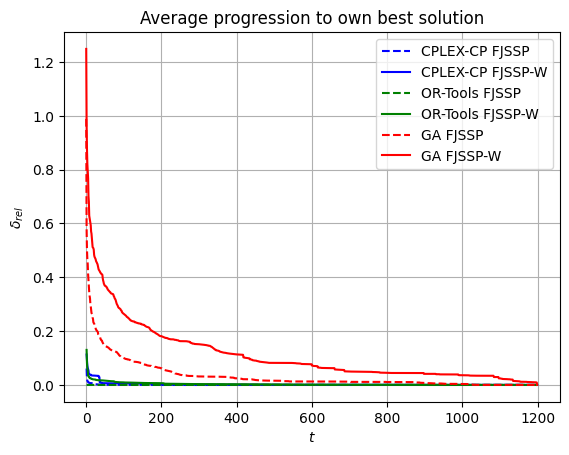

In [ ]:
plt.plot(range(1200), cplex_cp_avg_fjssp_progression, linestyle='dashed', c='blue', label='CPLEX-CP FJSSP')
plt.plot(range(1200), cplex_cp_avg_fjssp_w_progression, linestyle='solid', c='blue', label='CPLEX-CP FJSSP-W')
plt.plot(range(1200), ortools_avg_fjssp_progression, linestyle='dashed', c='green', label='OR-Tools FJSSP')
plt.plot(range(1200), ortools_avg_fjssp_w_progression, linestyle='solid', c='green', label='OR-Tools FJSSP-W')
plt.plot(range(1200), ga_avg_fjssp_progression, linestyle='dashed', c='red', label='GA FJSSP')
plt.plot(range(1200), ga_avg_fjssp_w_progression, linestyle='solid', c='red', label='GA FJSSP-W')
plt.xlabel('$t$')
plt.ylabel('$\delta_{rel}$')
plt.title('Average progression to own best solution')
plt.legend()

In [ ]:
cplex_lp_avg_fjssp_progression, cplex_lp_avg_fjssp_progression_all = get_average_progression_fjssp(cplp_fjssp)

In [ ]:
cplex_lp_avg_fjssp_w_progression, cplex_lp_avg_fjssp_w_progression_all = get_average_progression_fjssp_w(cplp_fjssp_w)

In [ ]:
gurobi_avg_fjssp_progression, gurobi_avg_fjssp_progression_all = get_average_progression_fjssp(gurobi_fjssp)

In [ ]:
gurobi_avg_fjssp_w_progression, gurobi_avg_fjssp_w_progression_all = get_average_progression_fjssp_w(gurobi_fjssp_w)

In [ ]:
#hexaly_avg_fjssp_progression, hexaly_avg_fjssp_progression_all = get_average_progression_fjssp(hexaly_fjssp)

In [ ]:
#hexaly_avg_fjssp_w_progression, hexaly_avg_fjssp_w_progression_all = get_average_progression_fjssp_w(hexaly_fjssp_w)

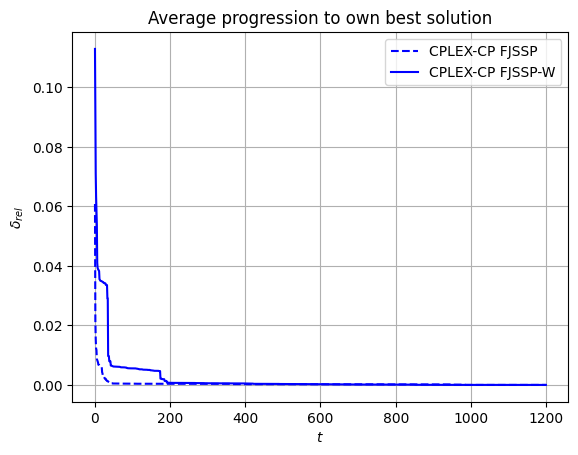

In [ ]:
plt.plot(range(1200), cplex_cp_avg_fjssp_progression, linestyle='dashed', c='blue', label='CPLEX-CP FJSSP')
plt.plot(range(1200), cplex_cp_avg_fjssp_w_progression, linestyle='solid', c='blue', label='CPLEX-CP FJSSP-W')
plt.xlabel('$t$')
plt.ylabel('$\delta_{rel}$')
plt.title('Average progression to own best solution')
plt.legend()

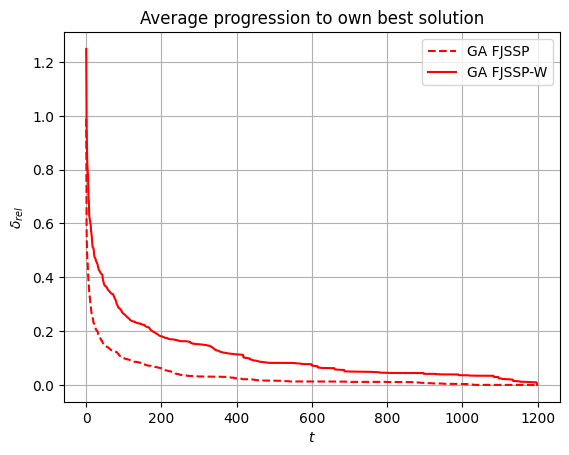

In [ ]:
plt.plot(range(1200), ga_avg_fjssp_progression, linestyle='dashed', c='red', label='GA FJSSP')
plt.plot(range(1200), ga_avg_fjssp_w_progression, linestyle='solid', c='red', label='GA FJSSP-W')
plt.xlabel('$t$')
plt.ylabel('$\delta_{rel}$')
plt.title('Average progression to own best solution')
plt.legend()

In [ ]:
x = list(range(0, 100, 10))

In [ ]:
x

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

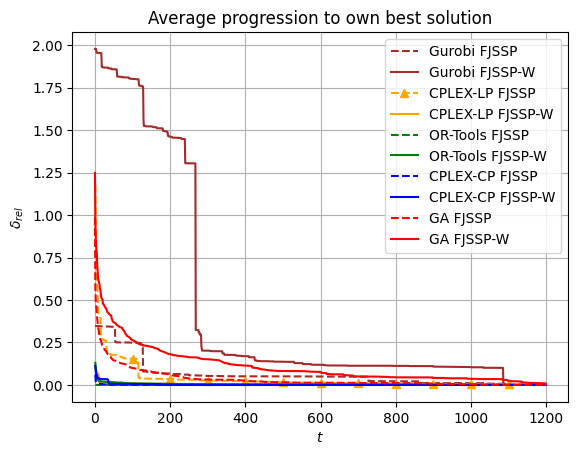

In [ ]:
plt.plot(range(1100), gurobi_avg_fjssp_progression[100:], linestyle='dashed', c='brown', label='Gurobi FJSSP') #NOTE ???????
plt.plot(range(1100), gurobi_avg_fjssp_w_progression[100:], linestyle='solid', c='brown', label='Gurobi FJSSP-W')
#plt.plot(range(1200), gurobi_avg_fjssp_progression, linestyle='dashed', c='brown', label='Gurobi FJSSP')
#plt.plot(range(1200), hexaly_avg_fjssp_progression, linestyle='dashed', c='purple', label='Hexaly FJSSP')
#plt.plot(range(1200), hexaly_avg_fjssp_w_progression, linestyle='solid', c='purple', label='Hexaly FJSSP-W')
markerson = list(range(0, 1200, 100))
plt.plot(range(1200), cplex_lp_avg_fjssp_progression, linestyle='dashed', c='orange', label='CPLEX-LP FJSSP', marker='^', markevery=markerson)
plt.plot(range(1200), cplex_lp_avg_fjssp_w_progression, linestyle='solid', c='orange', label='CPLEX-LP FJSSP-W')
plt.plot(range(1200), ortools_avg_fjssp_progression, linestyle='dashed', c='green', label='OR-Tools FJSSP')
plt.plot(range(1200), ortools_avg_fjssp_w_progression, linestyle='solid', c='green', label='OR-Tools FJSSP-W')
plt.plot(range(1200), cplex_cp_avg_fjssp_progression, linestyle='dashed', c='blue', label='CPLEX-CP FJSSP')
plt.plot(range(1200), cplex_cp_avg_fjssp_w_progression, linestyle='solid', c='blue', label='CPLEX-CP FJSSP-W')
plt.plot(range(1200), ga_avg_fjssp_progression, linestyle='dashed', c='red', label='GA FJSSP')
plt.plot(range(1200), ga_avg_fjssp_w_progression, linestyle='solid', c='red', label='GA FJSSP-W')
plt.xlabel('$t$')
plt.ylabel('$\delta_{rel}$')
plt.title('Average progression to own best solution')
plt.legend()

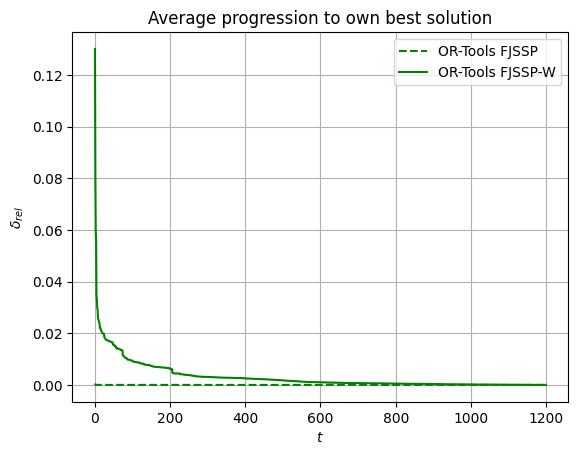

In [ ]:
plt.plot(range(1200), ortools_avg_fjssp_progression, linestyle='dashed', c='green', label='OR-Tools FJSSP')
plt.plot(range(1200), ortools_avg_fjssp_w_progression, linestyle='solid', c='green', label='OR-Tools FJSSP-W')
plt.xlabel('$t$')
plt.ylabel('$\delta_{rel}$')
plt.title('Average progression to own best solution')
plt.legend()

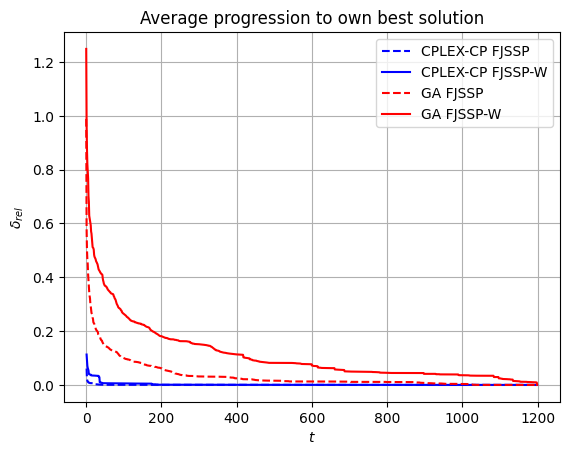

In [ ]:

plt.plot(range(1200), cplex_cp_avg_fjssp_progression, linestyle='dashed', c='blue', label='CPLEX-CP FJSSP')
plt.plot(range(1200), cplex_cp_avg_fjssp_w_progression, linestyle='solid', c='blue', label='CPLEX-CP FJSSP-W')
plt.plot(range(1200), ga_avg_fjssp_progression, linestyle='dashed', c='red', label='GA FJSSP')
plt.plot(range(1200), ga_avg_fjssp_w_progression, linestyle='solid', c='red', label='GA FJSSP-W')
plt.xlabel('$t$')
plt.ylabel('$\delta_{rel}$')
plt.title('Average progression to own best solution')
plt.legend()

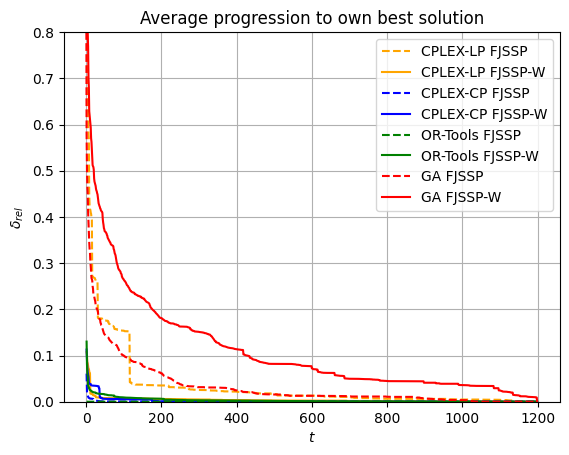

In [ ]:
alpha = 1
#plt.plot(range(1200), hexaly_avg_fjssp_progression, linestyle='dashed', c='purple', label='Hexaly FJSSP')
#plt.plot(range(1200), hexaly_avg_fjssp_w_progression, linestyle='solid', c='purple', label='Hexaly FJSSP-W', alpha=alpha)
plt.plot(range(1200), cplex_lp_avg_fjssp_progression, linestyle='dashed', c='orange', label='CPLEX-LP FJSSP')
plt.plot(range(1200), cplex_lp_avg_fjssp_w_progression, linestyle='solid', c='orange', label='CPLEX-LP FJSSP-W')
plt.plot(range(1200), cplex_cp_avg_fjssp_progression, linestyle='dashed', c='blue', label='CPLEX-CP FJSSP', alpha=alpha)
plt.plot(range(1200), cplex_cp_avg_fjssp_w_progression, linestyle='solid', c='blue', label='CPLEX-CP FJSSP-W', alpha=alpha)
plt.plot(range(1200), ortools_avg_fjssp_progression, linestyle='dashed', c='green', label='OR-Tools FJSSP', alpha=alpha)
plt.plot(range(1200), ortools_avg_fjssp_w_progression, linestyle='solid', c='green', label='OR-Tools FJSSP-W', alpha=alpha)
plt.plot(range(1200), ga_avg_fjssp_progression, linestyle='dashed', c='red', label='GA FJSSP', alpha=alpha)
plt.plot(range(1200), ga_avg_fjssp_w_progression, linestyle='solid', c='red', label='GA FJSSP-W', alpha=alpha)
plt.xlabel('$t$')
plt.ylabel('$\delta_{rel}$')
plt.ylim(0, 0.8)
#plt.yscale('log')
plt.title('Average progression to own best solution')
plt.legend()

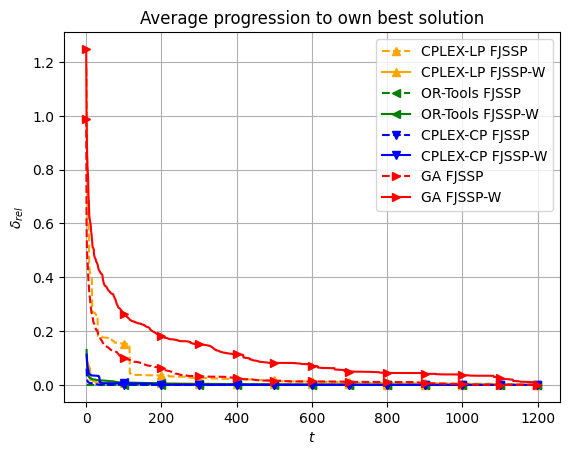

In [ ]:
markerson = list(range(0, 1200, 100))
markerson.append(1199)
plt.plot(range(1200), cplex_lp_avg_fjssp_progression, linestyle='dashed', c='orange', label='CPLEX-LP FJSSP', marker='^', markevery=markerson)
plt.plot(range(1200), cplex_lp_avg_fjssp_w_progression, linestyle='solid', c='orange', label='CPLEX-LP FJSSP-W', marker='^', markevery=markerson)
plt.plot(range(1200), ortools_avg_fjssp_progression, linestyle='dashed', c='green', label='OR-Tools FJSSP', marker='<', markevery=markerson)
plt.plot(range(1200), ortools_avg_fjssp_w_progression, linestyle='solid', c='green', label='OR-Tools FJSSP-W', marker='<', markevery=markerson)
plt.plot(range(1200), cplex_cp_avg_fjssp_progression, linestyle='dashed', c='blue', label='CPLEX-CP FJSSP', marker='v', markevery=markerson)
plt.plot(range(1200), cplex_cp_avg_fjssp_w_progression, linestyle='solid', c='blue', label='CPLEX-CP FJSSP-W', marker='v', markevery=markerson)
plt.plot(range(1200), ga_avg_fjssp_progression, linestyle='dashed', c='red', label='GA FJSSP', marker='>', markevery=markerson)
plt.plot(range(1200), ga_avg_fjssp_w_progression, linestyle='solid', c='red', label='GA FJSSP-W', marker='>', markevery=markerson)
plt.xlabel('$t$')
plt.ylabel('$\delta_{rel}$')
plt.title('Average progression to own best solution')
plt.legend()

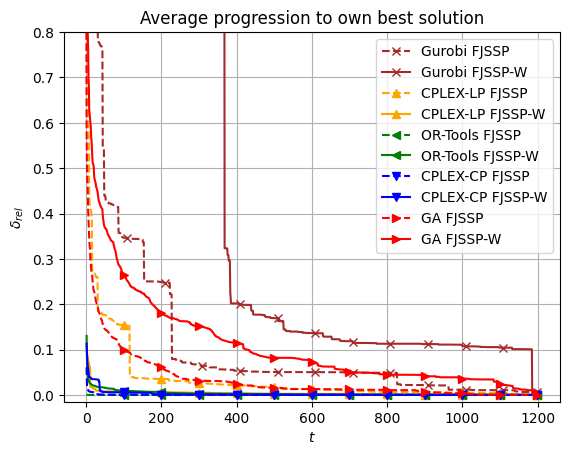

In [ ]:
alpha = 1
markerson = list(range(0, 1200, 100))
markerson.append(1199)
"""gf_list = [1.0] * 100
gfw_list = [1.0]*100
gf_list.extend(gurobi_avg_fjssp_progression[100:])
gfw_list.extend(gurobi_avg_fjss_pw_progression[100:])"""
gf_list = gurobi_avg_fjssp_progression
gfw_list = gurobi_avg_fjssp_w_progression
markerson_gurobi = list(range(int(len(gf_list)/11), len(gf_list), 100))
markerson_gurobi.append(1199)
plt.plot(range(1200), gf_list, linestyle='dashed', c='brown', label='Gurobi FJSSP', marker='x', markevery=markerson_gurobi) #NOTE ???????
plt.plot(range(1200), gfw_list, linestyle='solid', c='brown', label='Gurobi FJSSP-W', marker='x', markevery=markerson_gurobi)
plt.plot(range(1200), cplex_lp_avg_fjssp_progression, linestyle='dashed', c='orange', label='CPLEX-LP FJSSP', marker='^', markevery=markerson)
plt.plot(range(1200), cplex_lp_avg_fjssp_w_progression, linestyle='solid', c='orange', label='CPLEX-LP FJSSP-W', marker='^', markevery=markerson)
plt.plot(range(1200), ortools_avg_fjssp_progression, linestyle='dashed', c='green', label='OR-Tools FJSSP', marker='<', markevery=markerson)
plt.plot(range(1200), ortools_avg_fjssp_w_progression, linestyle='solid', c='green', label='OR-Tools FJSSP-W', marker='<', markevery=markerson)
plt.plot(range(1200), cplex_cp_avg_fjssp_progression, linestyle='dashed', c='blue', label='CPLEX-CP FJSSP', marker='v', markevery=markerson)
plt.plot(range(1200), cplex_cp_avg_fjssp_w_progression, linestyle='solid', c='blue', label='CPLEX-CP FJSSP-W', marker='v', markevery=markerson)
plt.plot(range(1200), ga_avg_fjssp_progression, linestyle='dashed', c='red', label='GA FJSSP', marker='>', markevery=markerson)
plt.plot(range(1200), ga_avg_fjssp_w_progression, linestyle='solid', c='red', label='GA FJSSP-W', marker='>', markevery=markerson)
plt.xlabel('$t$')
plt.ylabel('$\delta_{rel}$')
plt.ylim(-0.015, 0.8)
#plt.yscale('log')
plt.title('Average progression to own best solution')
plt.legend()

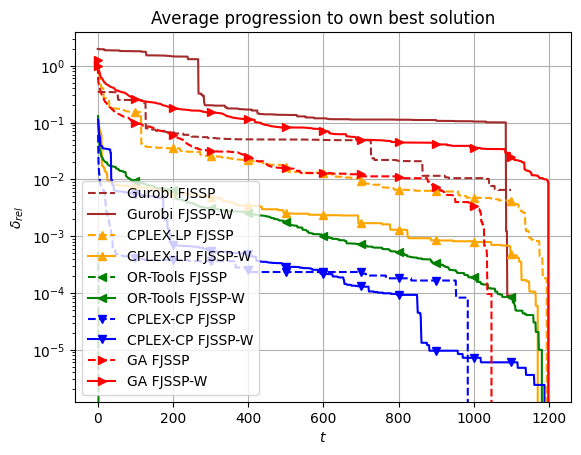

In [ ]:
alpha = 1
markerson = list(range(0, 1200, 100))
markerson.append(1199)
plt.plot(range(1100), gurobi_avg_fjssp_progression[100:], linestyle='dashed', c='brown', label='Gurobi FJSSP') #NOTE ???????
plt.plot(range(1100), gurobi_avg_fjssp_w_progression[100:], linestyle='solid', c='brown', label='Gurobi FJSSP-W')
plt.plot(range(1200), cplex_lp_avg_fjssp_progression, linestyle='dashed', c='orange', label='CPLEX-LP FJSSP', marker='^', markevery=markerson)
plt.plot(range(1200), cplex_lp_avg_fjssp_w_progression, linestyle='solid', c='orange', label='CPLEX-LP FJSSP-W', marker='^', markevery=markerson)
plt.plot(range(1200), ortools_avg_fjssp_progression, linestyle='dashed', c='green', label='OR-Tools FJSSP', marker='<', markevery=markerson)
plt.plot(range(1200), ortools_avg_fjssp_w_progression, linestyle='solid', c='green', label='OR-Tools FJSSP-W', marker='<', markevery=markerson)
plt.plot(range(1200), cplex_cp_avg_fjssp_progression, linestyle='dashed', c='blue', label='CPLEX-CP FJSSP', marker='v', markevery=markerson)
plt.plot(range(1200), cplex_cp_avg_fjssp_w_progression, linestyle='solid', c='blue', label='CPLEX-CP FJSSP-W', marker='v', markevery=markerson)
plt.plot(range(1200), ga_avg_fjssp_progression, linestyle='dashed', c='red', label='GA FJSSP', marker='>', markevery=markerson)
plt.plot(range(1200), ga_avg_fjssp_w_progression, linestyle='solid', c='red', label='GA FJSSP-W', marker='>', markevery=markerson)
plt.xlabel('$t$')
plt.ylabel('$\delta_{rel}$')
#plt.ylim(-0.015, 0.8)
#plt.ylim(0, 1000)
plt.yscale('log')
#plt.xscale('log')
plt.title('Average progression to own best solution')
plt.legend()

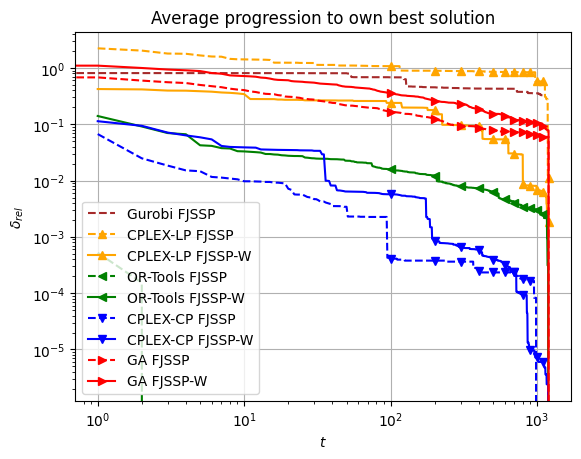

In [ ]:
alpha = 1
markerson = list(range(0, 1200, 100))
markerson.append(1199)
plt.plot(range(1100), gurobi_avg_fjssp_progression_all[100:], linestyle='dashed', c='brown', label='Gurobi FJSSP') #NOTE ???????
#plt.plot(range(1200), gurobi_avg_fjssp_w_progression, linestyle='solid', c='brown', label='Gurobi FJSSP-W')
plt.plot(range(1200), cplex_lp_avg_fjssp_progression_all, linestyle='dashed', c='orange', label='CPLEX-LP FJSSP', marker='^', markevery=markerson)
plt.plot(range(1200), cplex_lp_avg_fjssp_w_progression_all, linestyle='solid', c='orange', label='CPLEX-LP FJSSP-W', marker='^', markevery=markerson)
plt.plot(range(1200), ortools_avg_fjssp_progression_all, linestyle='dashed', c='green', label='OR-Tools FJSSP', marker='<', markevery=markerson)
plt.plot(range(1200), ortools_avg_fjssp_w_progression_all, linestyle='solid', c='green', label='OR-Tools FJSSP-W', marker='<', markevery=markerson)
plt.plot(range(1200), cplex_cp_avg_fjssp_progression_all, linestyle='dashed', c='blue', label='CPLEX-CP FJSSP', marker='v', markevery=markerson)
plt.plot(range(1200), cplex_cp_avg_fjssp_w_progression_all, linestyle='solid', c='blue', label='CPLEX-CP FJSSP-W', marker='v', markevery=markerson)
plt.plot(range(1200), ga_avg_fjssp_progression_all, linestyle='dashed', c='red', label='GA FJSSP', marker='>', markevery=markerson)
plt.plot(range(1200), ga_avg_fjssp_w_progression_all, linestyle='solid', c='red', label='GA FJSSP-W', marker='>', markevery=markerson)
plt.xlabel('$t$')
plt.ylabel('$\delta_{rel}$')
#plt.ylim(-0.015, 0.8)
#plt.ylim(0, 1000)
plt.yscale('log')
plt.xscale('log')
plt.title('Average progression to own best solution')
plt.legend()

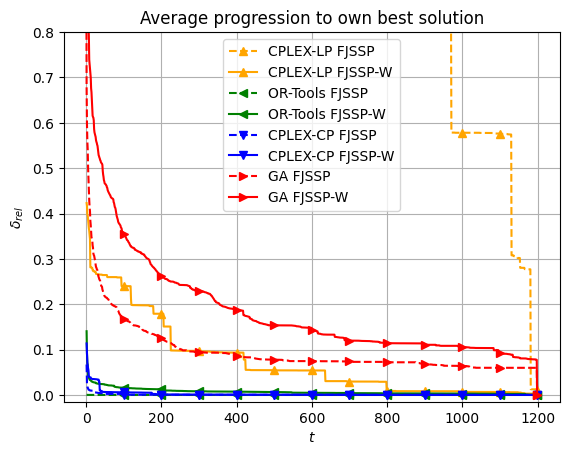

In [ ]:
alpha = 1
markerson = list(range(0, 1200, 100))
markerson.append(1199)
plt.plot(range(1200), cplex_lp_avg_fjssp_progression_all, linestyle='dashed', c='orange', label='CPLEX-LP FJSSP', marker='^', markevery=markerson)
plt.plot(range(1200), cplex_lp_avg_fjssp_w_progression_all, linestyle='solid', c='orange', label='CPLEX-LP FJSSP-W', marker='^', markevery=markerson)
plt.plot(range(1200), ortools_avg_fjssp_progression_all, linestyle='dashed', c='green', label='OR-Tools FJSSP', marker='<', markevery=markerson)
plt.plot(range(1200), ortools_avg_fjssp_w_progression_all, linestyle='solid', c='green', label='OR-Tools FJSSP-W', marker='<', markevery=markerson)
plt.plot(range(1200), cplex_cp_avg_fjssp_progression_all, linestyle='dashed', c='blue', label='CPLEX-CP FJSSP', marker='v', markevery=markerson)
plt.plot(range(1200), cplex_cp_avg_fjssp_w_progression_all, linestyle='solid', c='blue', label='CPLEX-CP FJSSP-W', marker='v', markevery=markerson)
plt.plot(range(1200), ga_avg_fjssp_progression_all, linestyle='dashed', c='red', label='GA FJSSP', marker='>', markevery=markerson)
plt.plot(range(1200), ga_avg_fjssp_w_progression_all, linestyle='solid', c='red', label='GA FJSSP-W', marker='>', markevery=markerson)
plt.xlabel('$t$')
plt.ylabel('$\delta_{rel}$')
plt.ylim(-0.015, 0.8)
#plt.yscale('log')
plt.title('Average progression to own best solution')
plt.legend()

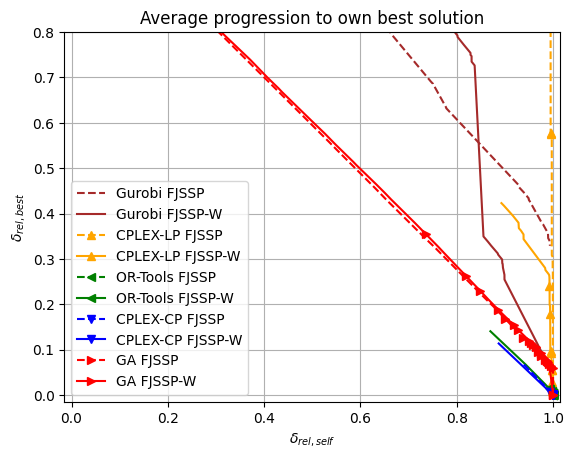

In [ ]:
alpha = 1
markerson = list(range(0, 1200, 100))
markerson.append(1199)
plt.plot([1.0-x for x in gurobi_avg_fjssp_progression], gurobi_avg_fjssp_progression_all, linestyle='dashed', c='brown', label='Gurobi FJSSP') #NOTE ???????
plt.plot([1.0-x for x in gurobi_avg_fjssp_w_progression], gurobi_avg_fjssp_w_progression_all, linestyle='solid', c='brown', label='Gurobi FJSSP-W')
plt.plot([1.0-x for x in cplex_lp_avg_fjssp_progression], cplex_lp_avg_fjssp_progression_all, linestyle='dashed', c='orange', label='CPLEX-LP FJSSP', marker='^', markevery=markerson)
plt.plot([1.0-x for x in cplex_lp_avg_fjssp_w_progression], cplex_lp_avg_fjssp_w_progression_all, linestyle='solid', c='orange', label='CPLEX-LP FJSSP-W', marker='^', markevery=markerson)
plt.plot([1.0-x for x in ortools_avg_fjssp_progression], ortools_avg_fjssp_progression_all, linestyle='dashed', c='green', label='OR-Tools FJSSP', marker='<', markevery=markerson)
plt.plot([1.0-x for x in ortools_avg_fjssp_w_progression], ortools_avg_fjssp_w_progression_all, linestyle='solid', c='green', label='OR-Tools FJSSP-W', marker='<', markevery=markerson)
plt.plot([1.0-x for x in cplex_cp_avg_fjssp_progression], cplex_cp_avg_fjssp_progression_all, linestyle='dashed', c='blue', label='CPLEX-CP FJSSP', marker='v', markevery=markerson)
plt.plot([1.0-x for x in cplex_cp_avg_fjssp_w_progression], cplex_cp_avg_fjssp_w_progression_all, linestyle='solid', c='blue', label='CPLEX-CP FJSSP-W', marker='v', markevery=markerson)
plt.plot([1.0-x for x in ga_avg_fjssp_progression], ga_avg_fjssp_progression_all, linestyle='dashed', c='red', label='GA FJSSP', marker='>', markevery=markerson)
plt.plot([1.0-x for x in ga_avg_fjssp_w_progression], ga_avg_fjssp_w_progression_all, linestyle='solid', c='red', label='GA FJSSP-W', marker='>', markevery=markerson)
plt.xlabel('$\delta_{rel, self}$')
plt.ylabel('$\delta_{rel, best}$')
plt.ylim(-0.015, 0.8)
plt.xlim(-0.015, 1.015)
#plt.yscale('log')
plt.title('Average progression to own best solution')
plt.legend()

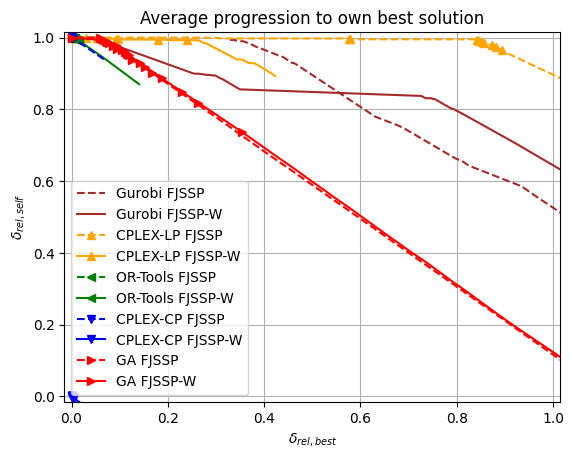

In [ ]:
alpha = 1
markerson = list(range(0, 1200, 100))
markerson.append(1199)
plt.plot( gurobi_avg_fjssp_progression_all,[1.0-x for x in gurobi_avg_fjssp_progression], linestyle='dashed', c='brown', label='Gurobi FJSSP') #NOTE ???????
plt.plot(gurobi_avg_fjssp_w_progression_all,[1.0-x for x in gurobi_avg_fjssp_w_progression],  linestyle='solid', c='brown', label='Gurobi FJSSP-W')
plt.plot(cplex_lp_avg_fjssp_progression_all, [1.0-x for x in cplex_lp_avg_fjssp_progression], linestyle='dashed', c='orange', label='CPLEX-LP FJSSP', marker='^', markevery=markerson)
plt.plot(cplex_lp_avg_fjssp_w_progression_all, [1.0-x for x in cplex_lp_avg_fjssp_w_progression], linestyle='solid', c='orange', label='CPLEX-LP FJSSP-W', marker='^', markevery=markerson)
plt.plot(ortools_avg_fjssp_progression_all, [1.0-x for x in ortools_avg_fjssp_progression], linestyle='dashed', c='green', label='OR-Tools FJSSP', marker='<', markevery=markerson)
plt.plot(ortools_avg_fjssp_w_progression_all,[1.0-x for x in ortools_avg_fjssp_w_progression],  linestyle='solid', c='green', label='OR-Tools FJSSP-W', marker='<', markevery=markerson)
plt.plot(cplex_cp_avg_fjssp_progression_all, [1.0-x for x in cplex_cp_avg_fjssp_progression], linestyle='dashed', c='blue', label='CPLEX-CP FJSSP', marker='v', markevery=markerson)
plt.plot(cplex_cp_avg_fjssp_w_progression_all, [.0-x for x in cplex_cp_avg_fjssp_w_progression], linestyle='solid', c='blue', label='CPLEX-CP FJSSP-W', marker='v', markevery=markerson)
plt.plot(ga_avg_fjssp_progression_all,[1.0-x for x in ga_avg_fjssp_progression],  linestyle='dashed', c='red', label='GA FJSSP', marker='>', markevery=markerson)
plt.plot(ga_avg_fjssp_w_progression_all,[1.0-x for x in ga_avg_fjssp_w_progression],  linestyle='solid', c='red', label='GA FJSSP-W', marker='>', markevery=markerson)
plt.xlabel('$\delta_{rel,best}$')
plt.ylabel('$\delta_{rel,self}$')
plt.ylim(-0.015, 1.015)
plt.xlim(-0.015, 1.015)
#plt.yscale('log')
plt.title('Average progression to own best solution')
plt.legend()

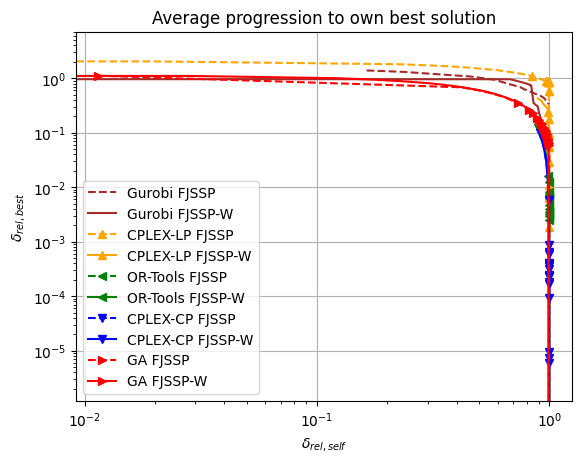

In [ ]:
alpha = 1
markerson = list(range(0, 1200, 100))
markerson.append(1199)
plt.plot([1-0-x for x in gurobi_avg_fjssp_progression][22:], gurobi_avg_fjssp_progression_all[22:], linestyle='dashed', c='brown', label='Gurobi FJSSP') #NOTE ???????
plt.plot([1-0-x for x in gurobi_avg_fjssp_w_progression][59:], gurobi_avg_fjssp_w_progression_all[59:], linestyle='solid', c='brown', label='Gurobi FJSSP-W')
plt.plot([1.0-x for x in cplex_lp_avg_fjssp_progression], cplex_lp_avg_fjssp_progression_all, linestyle='dashed', c='orange', label='CPLEX-LP FJSSP', marker='^', markevery=markerson)
plt.plot([1.0-x for x in cplex_lp_avg_fjssp_w_progression], cplex_lp_avg_fjssp_w_progression_all, linestyle='solid', c='orange', label='CPLEX-LP FJSSP-W', marker='^', markevery=markerson)
plt.plot([1.0-x for x in ortools_avg_fjssp_progression], ortools_avg_fjssp_progression_all, linestyle='dashed', c='green', label='OR-Tools FJSSP', marker='<', markevery=markerson)
plt.plot([1.0-x for x in ortools_avg_fjssp_w_progression], ortools_avg_fjssp_w_progression_all, linestyle='solid', c='green', label='OR-Tools FJSSP-W', marker='<', markevery=markerson)
plt.plot([1.0-x for x in cplex_cp_avg_fjssp_progression], cplex_cp_avg_fjssp_progression_all, linestyle='dashed', c='blue', label='CPLEX-CP FJSSP', marker='v', markevery=markerson)
plt.plot([1.0-x for x in cplex_cp_avg_fjssp_w_progression], cplex_cp_avg_fjssp_w_progression_all, linestyle='solid', c='blue', label='CPLEX-CP FJSSP-W', marker='v', markevery=markerson)
plt.plot([1.0-x for x in ga_avg_fjssp_progression], ga_avg_fjssp_progression_all, linestyle='dashed', c='red', label='GA FJSSP', marker='>', markevery=markerson)
plt.plot([1.0-x for x in ga_avg_fjssp_w_progression], ga_avg_fjssp_w_progression_all, linestyle='solid', c='red', label='GA FJSSP-W', marker='>', markevery=markerson)
plt.xlabel('$\delta_{rel, self}$')
plt.ylabel('$\delta_{rel, best}$')
#plt.ylim(-0.015, 0.8)
#plt.xlim(-0.015, 1.015)
plt.yscale('log')
plt.xscale('log')
plt.title('Average progression to own best solution')
plt.legend()

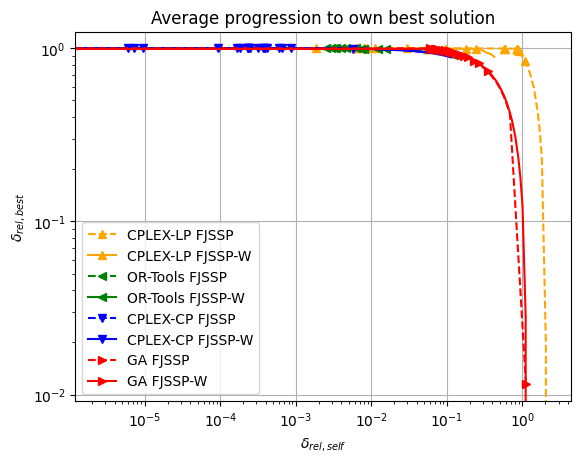

In [ ]:
alpha = 1
markerson = list(range(0, 1200, 100))
markerson.append(1199)
#plt.plot( gurobi_avg_fjssp_progression_all,[1-0-x for x in gurobi_avg_fjssp_progression], linestyle='dashed', c='brown', label='Gurobi FJSSP') #NOTE ???????
#plt.plot(gurobi_avg_fjssp_w_progression,[1-0-x for x in gurobi_avg_fjssp_w_progression],  linestyle='solid', c='brown', label='Gurobi FJSSP-W')
plt.plot(cplex_lp_avg_fjssp_progression_all, [1-0-x for x in cplex_lp_avg_fjssp_progression], linestyle='dashed', c='orange', label='CPLEX-LP FJSSP', marker='^', markevery=markerson)
plt.plot(cplex_lp_avg_fjssp_w_progression_all, [1-0-x for x in cplex_lp_avg_fjssp_w_progression], linestyle='solid', c='orange', label='CPLEX-LP FJSSP-W', marker='^', markevery=markerson)
plt.plot(ortools_avg_fjssp_progression_all, [1-0-x for x in ortools_avg_fjssp_progression], linestyle='dashed', c='green', label='OR-Tools FJSSP', marker='<', markevery=markerson)
plt.plot(ortools_avg_fjssp_w_progression_all,[1-0-x for x in ortools_avg_fjssp_w_progression],  linestyle='solid', c='green', label='OR-Tools FJSSP-W', marker='<', markevery=markerson)
plt.plot(cplex_cp_avg_fjssp_progression_all, [1-0-x for x in cplex_cp_avg_fjssp_progression], linestyle='dashed', c='blue', label='CPLEX-CP FJSSP', marker='v', markevery=markerson)
plt.plot(cplex_cp_avg_fjssp_w_progression_all, [1-0-x for x in cplex_cp_avg_fjssp_w_progression], linestyle='solid', c='blue', label='CPLEX-CP FJSSP-W', marker='v', markevery=markerson)
plt.plot(ga_avg_fjssp_progression_all,[1-0-x for x in ga_avg_fjssp_progression],  linestyle='dashed', c='red', label='GA FJSSP', marker='>', markevery=markerson)
plt.plot(ga_avg_fjssp_w_progression_all,[1-0-x for x in ga_avg_fjssp_w_progression],  linestyle='solid', c='red', label='GA FJSSP-W', marker='>', markevery=markerson)
plt.xlabel('$\delta_{rel,self}$')
plt.ylabel('$\delta_{rel,best}$')
#plt.ylim(-0.015, 1.015)
#plt.xlim(-0.015, 1.015)
plt.yscale('log')
plt.xscale('log')
plt.title('Average progression to own best solution')
plt.legend()

In [ ]:
cplex_lp_avg_fjssp_progression[1]

1.1777441688565768

In [ ]:
cplex_lp_avg_fjssp_w_progression[1]

0.10723234506609057

In [ ]:
cplex_cp_avg_fjssp_progression[1]

0.06077977461547169

In [ ]:
cplex_cp_avg_fjssp_w_progression[1]

0.11288486807047109

In [ ]:
ortools_avg_fjssp_progression[1]

0.000522273425499232

In [ ]:
ortools_avg_fjssp_w_progression[1]

0.13012712593225878

In [ ]:
ga_avg_fjssp_progression[0]

0.9885437489861678

In [ ]:
ga_avg_fjssp_w_progression[0]

1.2486626940250796